In [3]:

import random
import pandas as pd
from skopt import BayesSearchCV
# parameter ranges are specified by one of below
from skopt.space import Real, Categorical, Integer
import time
import datetime
import os
import numpy as np
from calendar import isleap
########################################################################################
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew, kurtosis



import matplotlib.dates as mdates
from datetime import datetime, timedelta

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
########################################################################################

# to read directories
import os
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as plticker
import warnings
warnings.filterwarnings('ignore')

#----------------------------------------------------------------------------------------

import math
#from wdmtoolbox import wdmtoolbox 
import matplotlib.dates as mdates
from dateutil import relativedelta

import numpy.polynomial.polynomial as poly

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from functools import reduce

from PIL import Image

from itertools import islice

import csv

# to avoid error warnings 'implicitly registered datetime coverter'
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# to center figures and tables throughout the report
from IPython.display import display, HTML
display(HTML("""<style>.output {
    display: flex;
    align-items: center;
    text-align: center;}</style> """))

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
#from sklearn.model_selection import BayesSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

####
import shap
shap.initjs()

from time import time
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import datetime


%run -i XAI.py

In [4]:
def read_tabular_data(file_name,base_dir):
    df      = os.path.join(base_dir,file_name)
    df_read = pd.read_csv(df, thousands=r',')                                   
    return df_read

# File name and base_directory

In [5]:
#Importing the SA Intl climate data
base_dir = r"/home/c0d3b23ak32/Desktop/Model/Code and Data/SA Intl Hist Climate Data"
###################################################################################################
###################################################################################################
filename = r"Daily Precipitation and Temperature - San Antonio TX Intl Airport from Sep 1 1946 to Nov 29 2020.csv"

In [8]:

df_hist_climate = read_tabular_data(filename, base_dir

df_hist_climate.index = pd.DatetimeIndex(df_hist_climate['DATE'])
df_hist_climate_NOAA = pd.DataFrame()
df_hist_climate_NOAA['$T_{min}$ [$^oC$]'] = ((pd.to_numeric(df_hist_climate['DAILY MIN TEMP (DEG F)'], errors='coerce').values) - 32)*5/9
df_hist_climate_NOAA['$T_{max}$ [$^oC$]'] = ((pd.to_numeric(df_hist_climate['DAILY MAX TEMP (DEG F)'], errors='coerce').values) - 32)*5/9
df_hist_climate_NOAA['$P$ [mm]'] = (pd.to_numeric(df_hist_climate['DAILY PRECIPITATION (inches)'], errors='coerce').values)*25.4
df_hist_climate_NOAA.index = df_hist_climate.index
df_hist_climate_NOAA

df_AI = pd.DataFrame()

df_AI['$T_{min}$ [$^oC$]'] = df_hist_climate_NOAA['$T_{min}$ [$^oC$]'].resample('W').mean()
df_AI['$T_{max}$ [$^oC$]'] = df_hist_climate_NOAA['$T_{max}$ [$^oC$]'].resample('W').mean()
df_AI['$P$ [mm]'] = df_hist_climate_NOAA['$P$ [mm]'].resample('W').sum()
df_AI 


,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
DATE,,,
1946-09-01,21.111111,33.333333,0.508
1946-09-08,21.904762,32.063492,6.858
1946-09-15,21.190476,31.031746,129.032
1946-09-22,21.269841,29.523810,3.810
1946-09-29,20.555556,28.015873,260.604
...,...,...,...
2020-11-01,6.269841,21.428571,4.064
2020-11-08,11.190476,26.587302,0.000
2020-11-15,16.746032,27.222222,0.000


In [9]:
def data_reader_Comal(file_name,base_dir, skip_rows):
    df      = os.path.join(base_dir,file_name)
    df_read = pd.read_csv(df, thousands=r',', skiprows = skip_rows) 
    return df_read


# Change the springs

In [28]:
# -- Comal Springs Data 
skip_rows = 30
###----Give the base directory adn file name of the springs-------------####
base_dir  = r"/home/c0d3b23ak32/Desktop/Model/Springs_EAA/Comal_Springs"
filename  = r"Daily_SpringDischarge_Comal_Spring.csv"
#-----------------------------------------------------------------------#
Comal_Spring_Flow_or = data_reader_Comal(filename, base_dir, skip_rows)
Comal_Spring_Flow_or  

Comal_Spring_Flow = []
Comal_Spring_Flow = Comal_Spring_Flow_or[['20d', '14n']].copy()
Comal_Spring_Flow = Comal_Spring_Flow.rename(columns = {'20d' : 'Date', '14n' : 'SF(cfs)'})

Comal_Spring_Flow['Date']  =  pd.to_datetime(Comal_Spring_Flow['Date'])
Comal_Spring_Flow['SF$[m^3/s]$'] = round(Comal_Spring_Flow['SF(cfs)'].astype(float)*0.028316847, 3)
Comal_Spring_Flow.drop(index=0,inplace=True)

Comal_Spring_Flow.index = pd.DatetimeIndex(Comal_Spring_Flow['Date'])
Comal_Spring_Flow.drop('Date',axis =1,inplace=True)

#Comal_Spring dataframe
Comal_Spring_Flow
#####
df_numeric_values_Cml = pd.to_numeric(Comal_Spring_Flow['SF$[m^3/s]$'], errors='coerce')

SF_data = df_numeric_values_Cml.to_frame()


#Data is Transformed to  Monthly mean from daily data and truncated 
SF_Data = SF_data.resample('W').mean()
SF_Data= SF_Data[(SF_Data.index >= '1946-09-01') & (SF_Data.index <= '2020-11-29')]

df_AI = pd.concat([df_AI,SF_Data], axis=1)

#df_AI = df_AI[(df_AI.index >= given_start_date)]
df_AI.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$,SF$[m^3/s]$
count,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000
mean,14.749042,26.796088,14.946802,7.906829,7.906829
std,7.595685,7.133037,28.066030,2.618164,2.618164
min,-8.968254,1.111111,0.000000,0.000000,0.000000
25%,8.333333,21.349206,0.000000,6.241571,6.241571
50%,15.555556,27.539683,3.302000,8.240000,8.240000
75%,22.063492,32.857143,18.034000,9.769000,9.769000
max,26.428571,39.761905,383.794000,14.401000,14.401000


In [7]:
df_AI.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,3144.000000,3144.000000,3144.000000,3144.000000
mean,14.817087,26.793792,15.454413,8.277359
std,7.629288,7.103033,28.606174,2.412999
min,-6.666667,1.111111,0.000000,0.750000
25%,8.333333,21.507937,0.000000,6.642143
50%,15.674603,27.539683,3.556000,8.493071
75%,22.142857,32.777778,19.050000,10.032321
max,26.428571,39.761905,383.794000,14.401000


In [8]:
# Pumping patterns is hypothesized to be associated with the month
df_AI['Month'] = df_AI.index.month 

# There could be some lag effects in the hydroclimatic behavior for Karst aquifers
df_AI['$T_{max}^{lag1}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(1)
df_AI['$T_{max}^{lag2}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(2)

df_AI['$T_{min}^{lag1}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(1)
df_AI['$T_{min}^{lag2}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(2)

df_AI['$P^{lag1}$ [mm]'] = df_AI['$P$ [mm]'].shift(1)
df_AI['$P^{lag2}$ [mm]'] = df_AI['$P$ [mm]'].shift(2)

df_AI['SF$^{lag1} [m^3/s]$'] = df_AI['SF$[m^3/s]$'].shift(1)
df_AI['SF$^{lag2} [m^3/s]$'] = df_AI['SF$[m^3/s]$'].shift(2)



df_AI.dropna(inplace=True)
#df_AI.describe()

In [9]:

Features = ['Month','$T_{min}$ [$^oC$]','$T_{max}$ [$^oC$]','$P$ [mm]',
            '$P^{lag1}$ [mm]','$P^{lag2}$ [mm]',
            'SF$^{lag1} [m^3/s]$','SF$^{lag2} [m^3/s]$']

#SpringFlow for Comal = Target
Target = ['SF$[m^3/s]$']


#Take the tain set till 2005 and test set from 2006 till 2020

df_AI_Train = df_AI['1960-09-01':'2005-12-31']
df_AI_Test = df_AI['2006-01-01':'2020-11-29']

#Create Independent and dependent variable for machine learning
X = df_AI[Features].to_numpy()
Y = df_AI[Target].to_numpy()

In [10]:
train_X = df_AI_Train[Features].to_numpy()
train_y = df_AI_Train[Target].to_numpy()
test_X = df_AI_Test[Features].iloc[0].to_numpy().reshape(1, -1)


# Genetic algorithm

In [30]:
import numpy as np
import pandas as pd
from geneticalgorithm import geneticalgorithm as ga
from evolutionary_algorithm import EvolutionaryAlgorithm as ea
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import AdaBoostRegressor

In [22]:



scoring_param = make_scorer(mean_squared_error,greater_is_better=False)

# Declare objective function parameters and bounds
objective_parameters = [

	{'name' : 'n_estimators',
	 'bounds' : [100,1000],
	 'type' : 'int'},
	{'name' : 'max_depth',   
	 'bounds' : [6,12],
	 'type' : 'int'} ]


algorithm_param = {'max_num_iteration': 50,\
				   'population_size':100,\
				   'mutation_probability':0.1,\
				   'elite_ratio': 0.01,\
				   'crossover_probability': 0.5,\
				   'parents_portion': 0.3,\
				   'crossover_type':'uniform',\
				   'max_iteration_without_improv':8}


##Define the function

def objective_function(args):
	clf = RandomForestRegressor(**args)
	cv = KFold(n_splits=5)
	scoring_param = make_scorer(mean_squared_error,greater_is_better=False, )
	g = cross_val_score(clf, train_X, train_y.ravel(), cv=cv, scoring=scoring_param,) 
	mse = g.mean()
	
	
	return mse

## Call the Genetic Algorithm search and 
evo_algo = ea(function=objective_function, 
		   parameters=objective_parameters,
			  algorithm_parameters=algorithm_param,function_timeout=100)


# Run EA
evo_algo.run()

# Access best model parameters
evo_algo.best_parameters


 34%|███▍      | 17/50 [02:42<05:15,  9.56s/it]

Best parameters found: {'n_estimators': 264, 'max_depth': 6}
Best objective output = -0.07965847465511507
Terminating algorithm: Exceeded maximum iterations without improvement.

{'n_estimators': 264, 'max_depth': 6}

params = evo_algo.best_parameters

# UnBlock the cell below or copy and paste to use.

In [23]:
params={'n_estimators': 264, 'max_depth': 6}
xgb_model_SF = RandomForestRegressor(**params)


# Cross Validation

In [72]:


##
clf = XGBRegressor(**params)
cv = KFold(n_splits=3)
scoring_param = make_scorer(mean_squared_error,greater_is_better=False,squared=True)

g = cross_val_score(clf, train_X, train_y.ravel(), cv=3, scoring=scoring_param)
g = g.mean()
g

-0.13395549263118398

In [37]:
params = {'learning_rate': 0.9651215758231784, 'n_estimators': 633, 'max_depth': 9}
xgb_model_SF =XGBRegressor(**params)
xgb_model_SF.fit(train_X, train_y)
Y_Train_Pred = xgb_model_SF.predict(train_X)

In [38]:

rmse = np.sqrt(mean_squared_error(train_y,Y_Train_Pred))
RSQ = r2_score(train_y,Y_Train_Pred)
MAE = np.mean(np.abs(train_y - Y_Train_Pred))
MBE = np.mean(train_y - Y_Train_Pred)
print("############ Model Accuracy Xgboost -Train ############")
print("RMSE: %0.3f" % rmse,'m')
print("MAE: %0.3f" % MAE,'m')
print("MBE: %0.3f" % MBE,'m')
print("R-squared: %0.3f" % RSQ)
print("########################################")
print(" ")


############ Model Accuracy Xgboost -Train ############
RMSE: 0.001 m
MAE: 2.732 m
MBE: 0.000 m
R-squared: 1.000
########################################
 


# Give base file path to save results

In [75]:
import os
patht = os.getcwd() 
directories ='RF_tuned'
pathto_save= os.path.join(patht,directories)

os.mkdir(pathto_save)

In [39]:


#################################################################################################
# Make predictions on Testing data and Test model accuracy
#################################################################################################
df_AI_Test['SF$^{pred} [m^3/s]$'] = 0
Test_X = df_AI_Test[Features].iloc[0].to_numpy().reshape(1, -1)
df_AI_Test['SF$^{pred} [m^3/s]$'].iloc[0] = xgb_model_SF.predict(Test_X)[0]

i = 0
for row in df_AI_Test.itertuples():
    df_AI_Test['SF$^{lag1} [m^3/s]$'][i+1] = df_AI_Test['SF$^{pred} [m^3/s]$'].iloc[i]
    
    df_AI_Test['SF$^{lag2} [m^3/s]$'][i+1] = df_AI_Test['SF$^{lag1} [m^3/s]$'].iloc[i]
    
    Test_X = df_AI_Test[Features].iloc[i+1].to_numpy().reshape(1, -1)
    df_AI_Test['SF$^{pred} [m^3/s]$'].iloc[i+1] = xgb_model_SF.predict(Test_X)[0]
    i = i+1
    if i == (len(df_AI_Test)-1):
        break

rmse = np.sqrt(mean_squared_error(df_AI_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy(),
                                  df_AI_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy()))
RSQ = r2_score(df_AI_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy(),
               df_AI_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy())
MAE = np.mean(np.abs(df_AI_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy() - 
                     df_AI_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy()))
MBE = np.mean(df_AI_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy() - 
              df_AI_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy())
print("############ Model Accuracy XGBoost -Test ############")
print("RMSE: %0.3f" % rmse,'m')
print("MAE: %0.3f" % MAE,'m')
print("MBE: %0.3f" % MBE,'m')
print("R-squared: %0.3f" % RSQ)
print("########################################")
print(" ")


############ Model Accuracy XGBoost -Test ############
RMSE: 1.387 m
MAE: 1.258 m
MBE: -1.235 m
R-squared: 0.638
########################################
 


# Check the current directory

In [77]:
pathto_lin_save= pathto_save

In [78]:
##----Folder to save validation plots --------##
directories = 'RF'
pathto_boost_save= os.path.join(pathto_save,directories)

#os.mkdir(pathto_boost_save)

##----Folder to Feature plots --------##
directories = 'Feature_importace'
pathto_features_save= os.path.join(pathto_save,directories)

#os.mkdir(pathto_features_save)

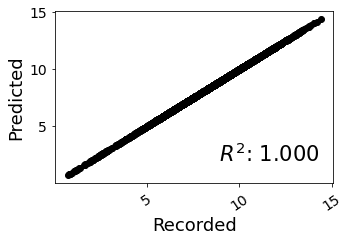

In [79]:
fig, ax1 = plt.subplots(1,1, figsize=(5,3.5))

# ###################################################################################################

ax1.scatter(df_AI_Train['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy(), 
            pd.Series(Y_Train_Pred).sort_values(ascending=True).to_numpy(), 
            marker='o', color = 'black')

RSQ = np.round((r2_score(df_AI_Train['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy(), 
            pd.Series(Y_Train_Pred).sort_values(ascending=True).to_numpy())),3)

ax1.text(0.95, 0.1, ("$R^2$: %0.03f" % RSQ),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='black', fontsize=21)

ax1.set_xlabel('Recorded', fontsize = 18)
ax1.tick_params(axis = "x", labelsize = 14, rotation=34)
ax1.xaxis.set_tick_params(pad=5)
ax1.set_ylabel('Predicted', fontsize = 18)
ax1.tick_params(axis = "y", labelsize = 14)
ax1.yaxis.set_tick_params(pad=5)


plt.tight_layout(pad=1.2)
fig.savefig(pathto_lin_save + '/Train_Plot_Hist_All_Features_XGBoost.jpg', format='jpeg', dpi=300, bbox_inches='tight')

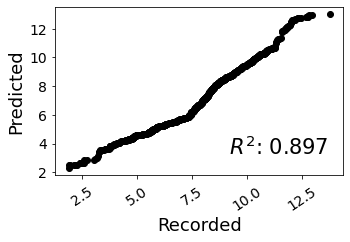

In [80]:
fig, ax1 = plt.subplots(1,1, figsize=(5,3.5))
# ###################################################################################################

ax1.scatter(df_AI_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy(), 
            df_AI_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy(), 
            marker='o', color = 'black')

RSQ = np.round((r2_score(df_AI_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy(), 
            df_AI_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy())),3)

ax1.text(0.95, 0.1, ("$R^2$: %0.03f" % RSQ),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='black', fontsize=21)

ax1.set_xlabel('Recorded', fontsize = 18)
ax1.tick_params(axis = "x", labelsize = 14, rotation=34)
ax1.xaxis.set_tick_params(pad=5)
ax1.set_ylabel('Predicted', fontsize = 18)
ax1.tick_params(axis = "y", labelsize = 14)
ax1.yaxis.set_tick_params(pad=5)


plt.tight_layout(pad=1.2)
fig.savefig(pathto_lin_save + '/Test_Plot_Hist_All_Features_XGBoost.jpg', format='jpeg', dpi=300, bbox_inches='tight')

In [81]:
pathto_features_save

'/home/c0d3b23ak32/Desktop/Paper_ready/Springs/Comal/tuned/Feature_importace'

# Shapley Analysis

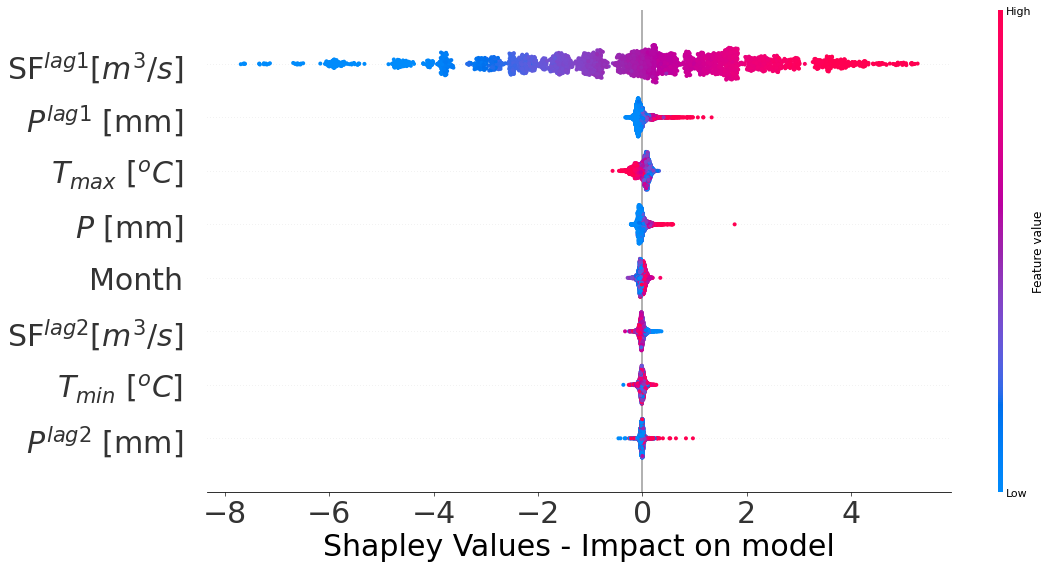

In [82]:
explainer = shap.TreeExplainer(xgb_model_SF)
shap_values = explainer.shap_values(df_AI[Features].to_numpy())

shap.summary_plot(shap_values, df_AI[Features].to_numpy(), Features, plot_size=(16,8), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout(pad=1.08)
plt.savefig(pathto_features_save + str('/Feature Importances - SF_.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


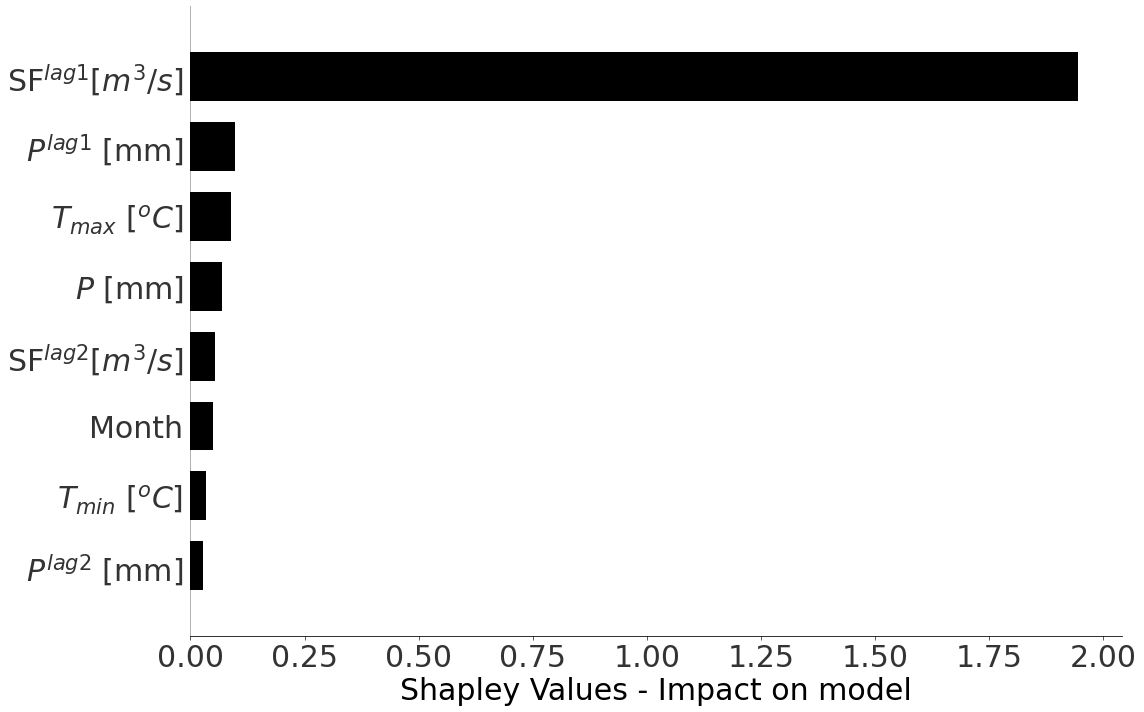

In [83]:
#################################################################################################
# Update Model SpringFLow Model
#################################################################################################20
#With the whole data from 1946 -2020
xgb_model_SF = xgb_model_SF.fit(X, Y)

explainer = shap.TreeExplainer(xgb_model_SF)
shap_values = explainer.shap_values(df_AI[Features].to_numpy())

shap.summary_plot(shap_values, df_AI[Features].to_numpy(), Features, plot_size=(16,10), show=False, 
                  plot_type = "bar", color = "black")
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout(pad=1.08)
plt.savefig(pathto_features_save + str('/Feature Importances - SF_Comal - Hist.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


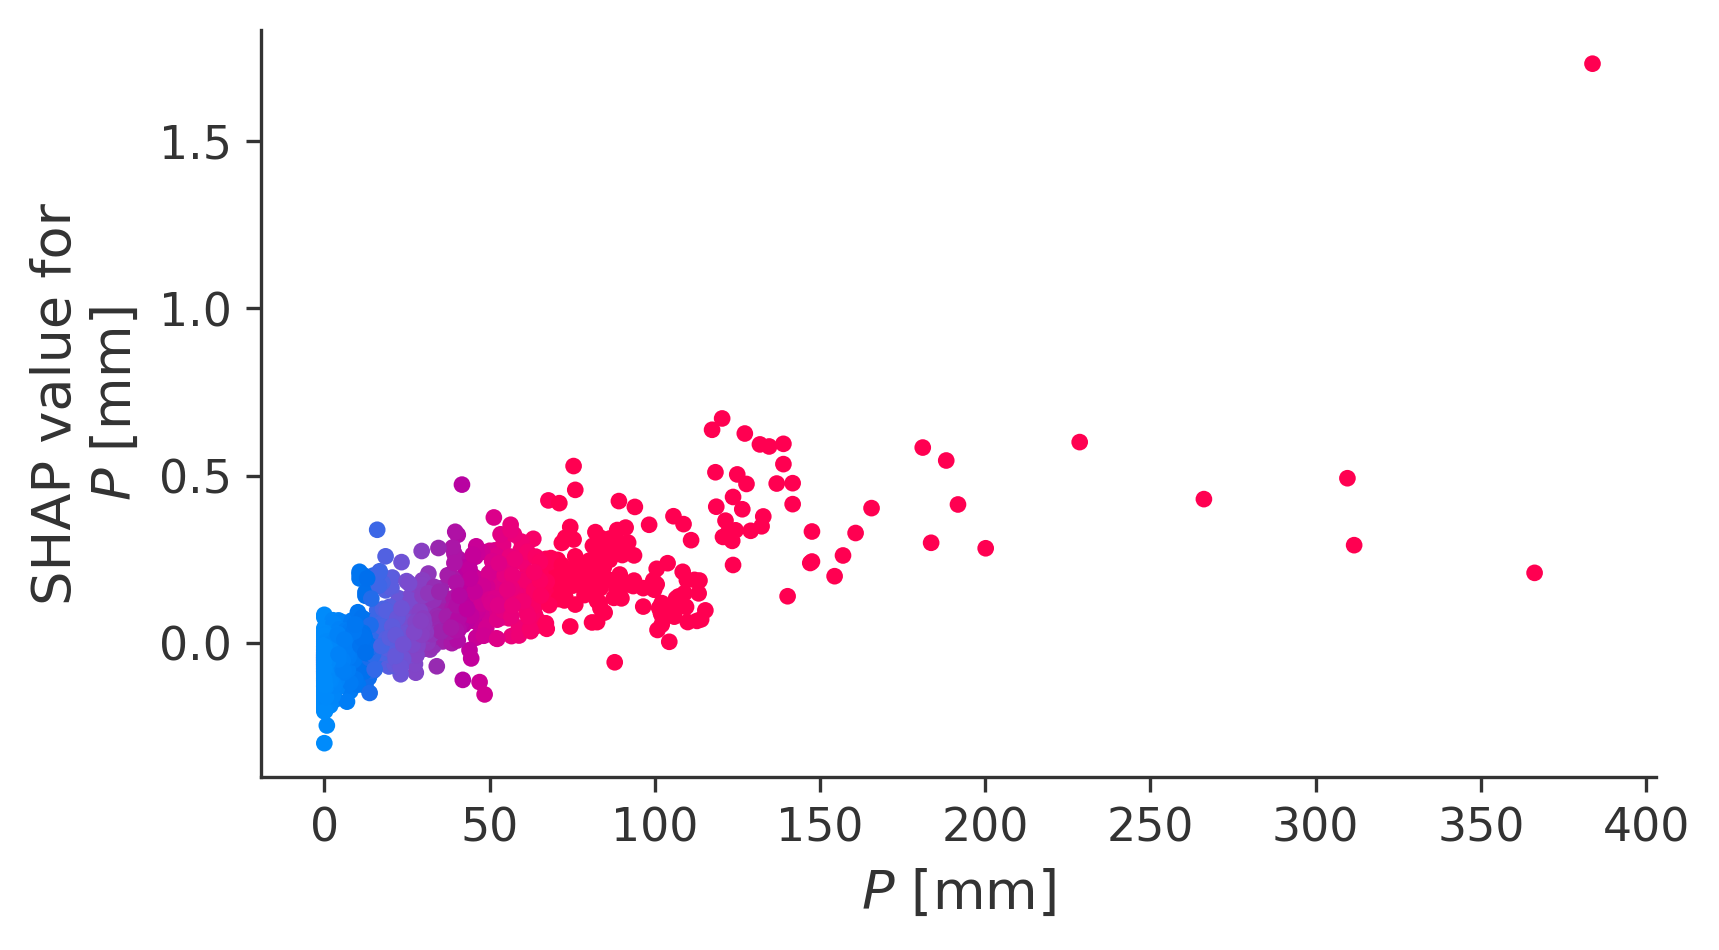

In [84]:
fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

   
shap.dependence_plot('$P$ [mm]',shap_values, df_AI[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='$P$ [mm]')
plt.savefig(pathto_features_save +str('/Pr -.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


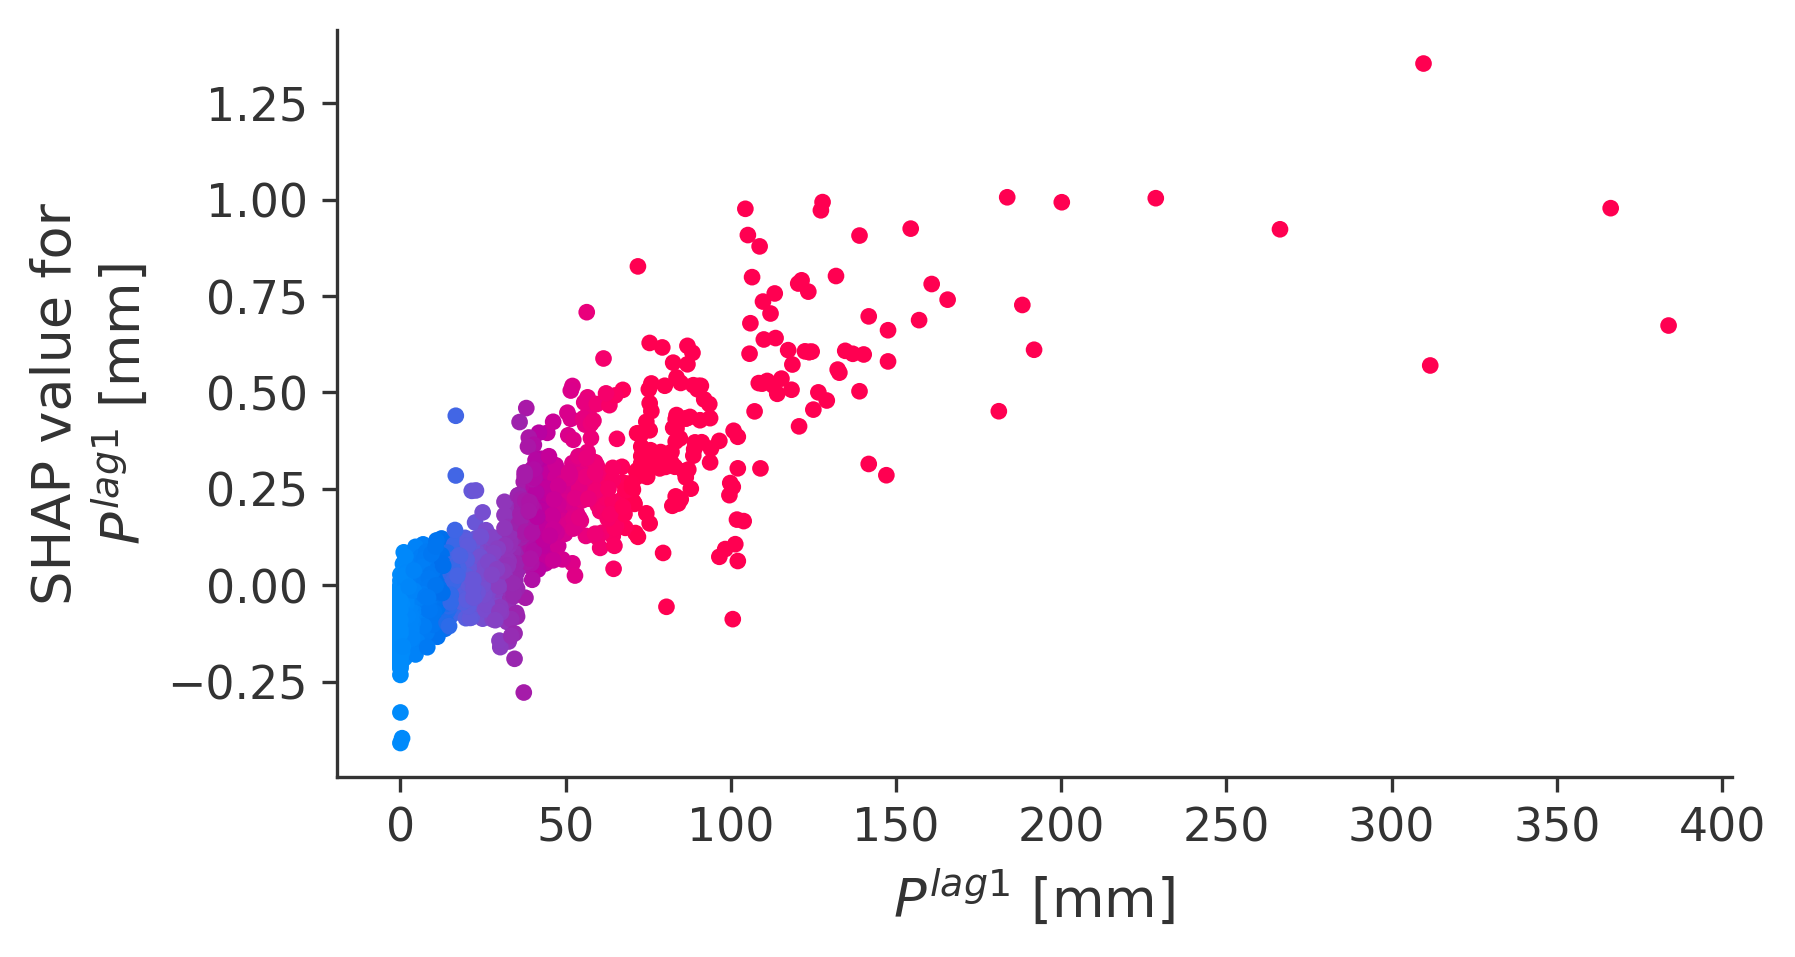

In [85]:
fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

   
shap.dependence_plot('$P^{lag1}$ [mm]',shap_values, df_AI[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='$P^{lag1}$ [mm]')
plt.savefig(pathto_features_save +str('/Pr^LAG -.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


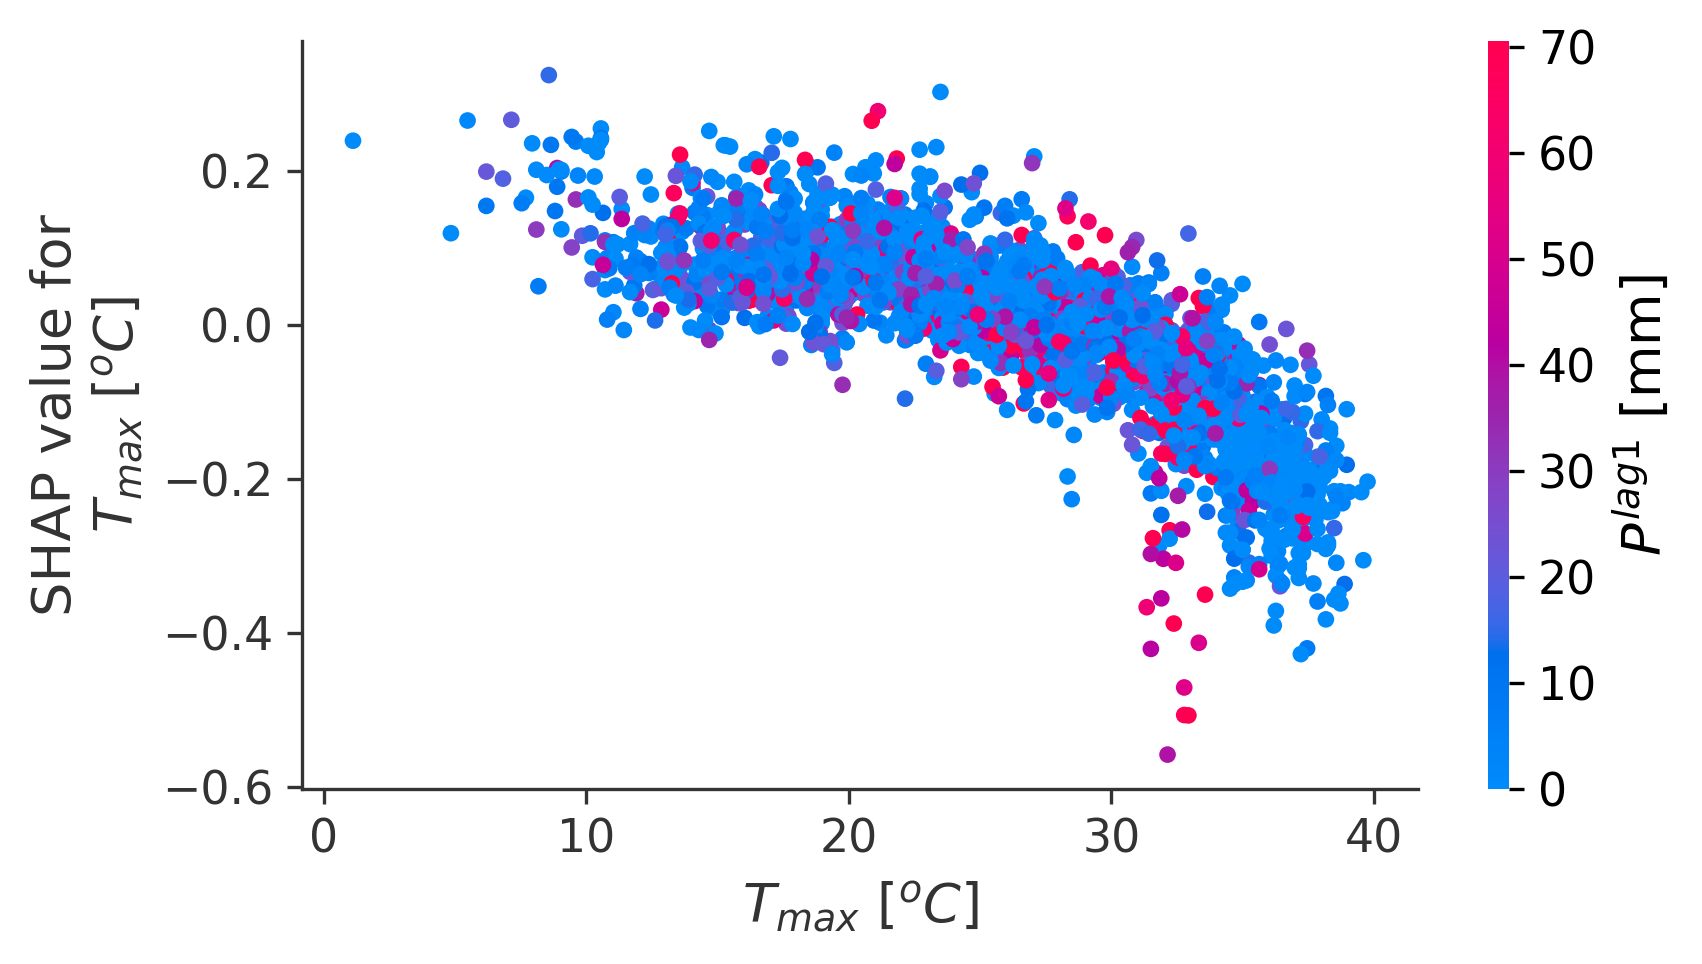

In [86]:
fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

   
shap.dependence_plot( '$T_{max}$ [$^oC$]',shap_values, df_AI[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='$P^{lag1}$ [mm]')
#plt.savefig(pathto_features_save +str('/Pr^LAG -.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


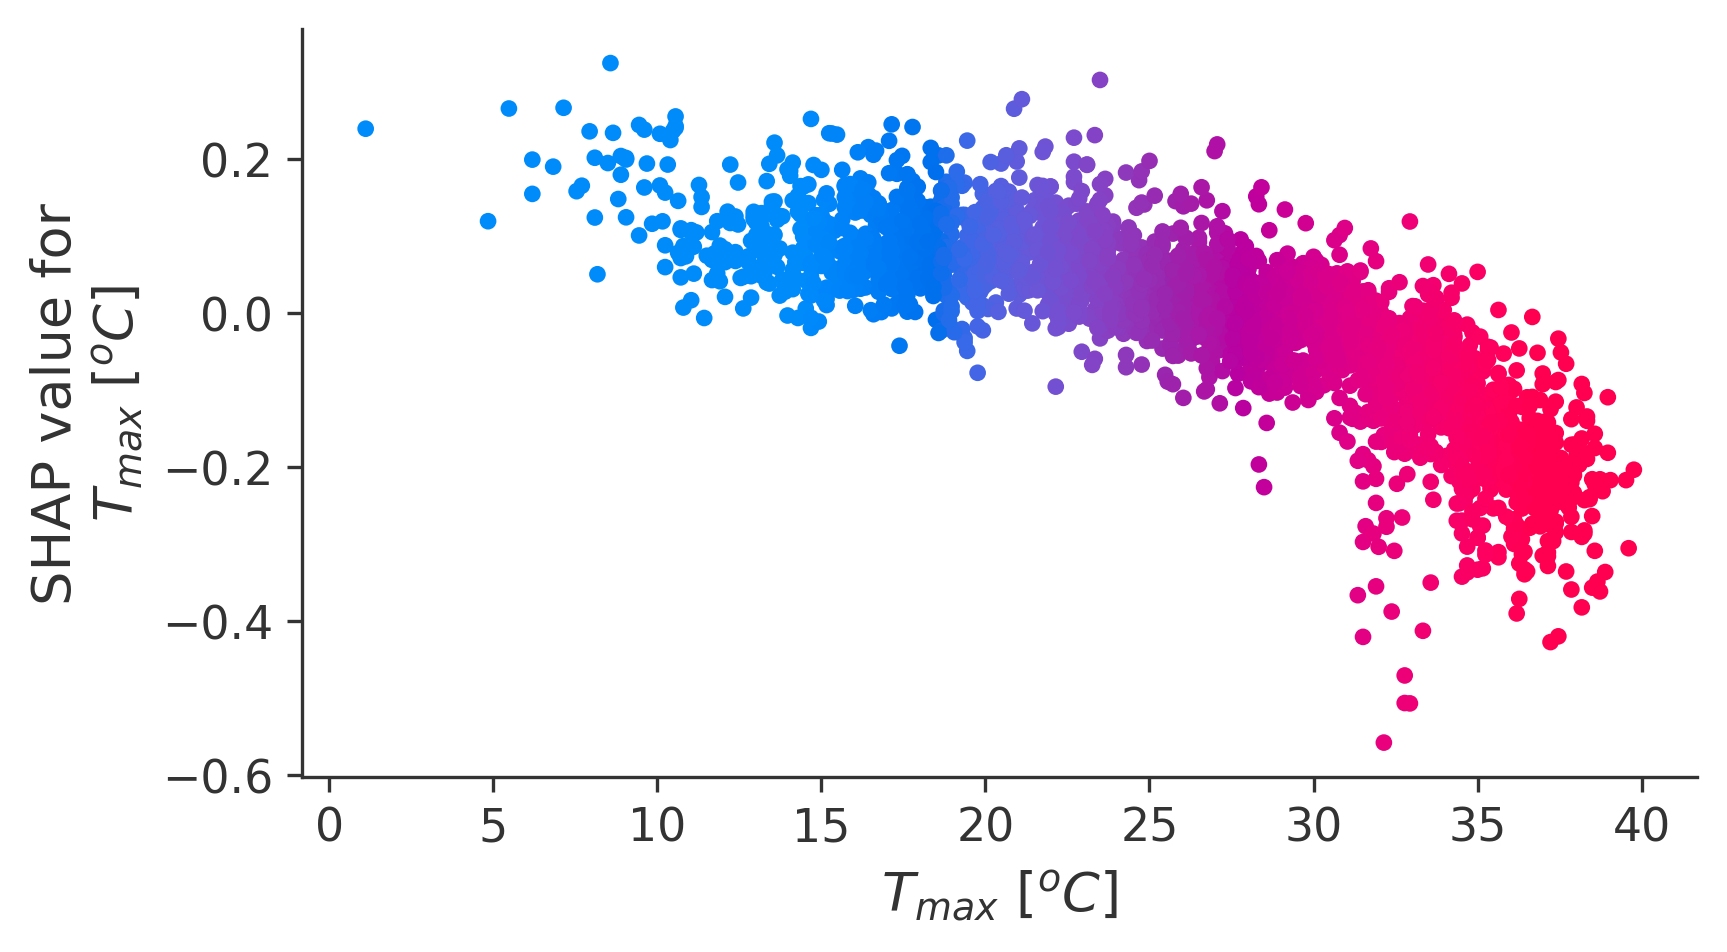

In [87]:

fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

   
shap.dependence_plot('$T_{max}$ [$^oC$]', shap_values, df_AI[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='$T_{max}$ [$^oC$]')
plt.savefig(pathto_features_save +str('/Tmax - Hist.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


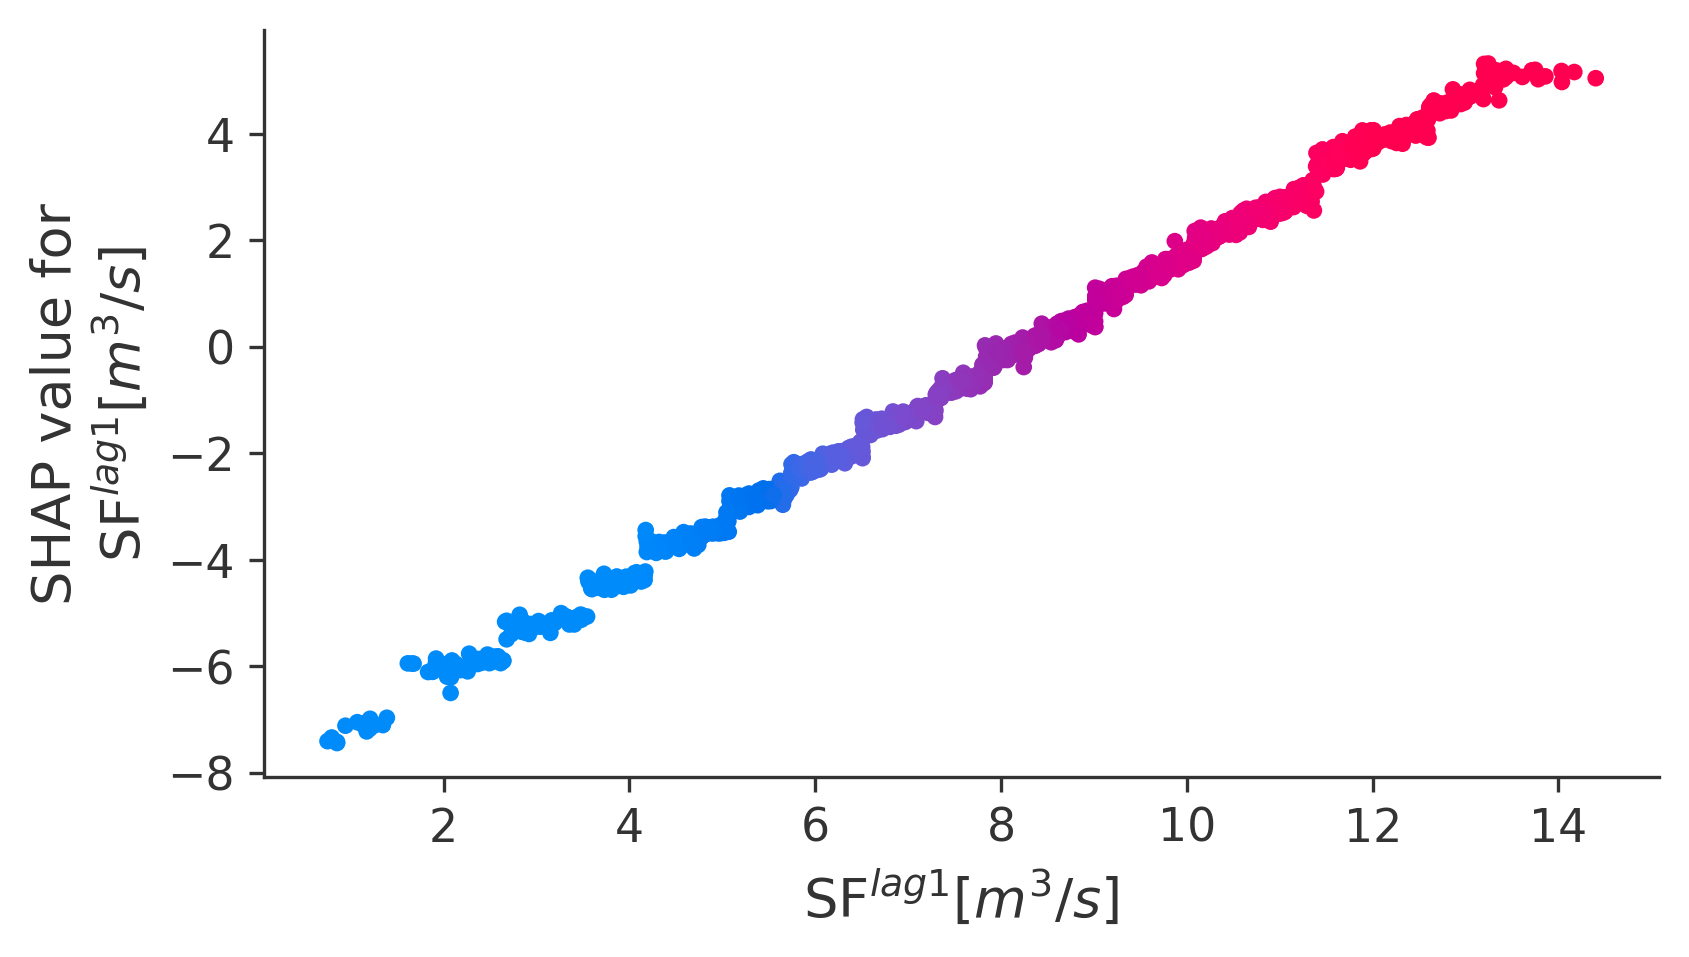

In [88]:

fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

   
shap.dependence_plot('SF$^{lag1} [m^3/s]$',shap_values, df_AI[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='SF$^{lag1} [m^3/s]$')
plt.savefig(pathto_features_save+str('/SF_Lag1 Hist.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')




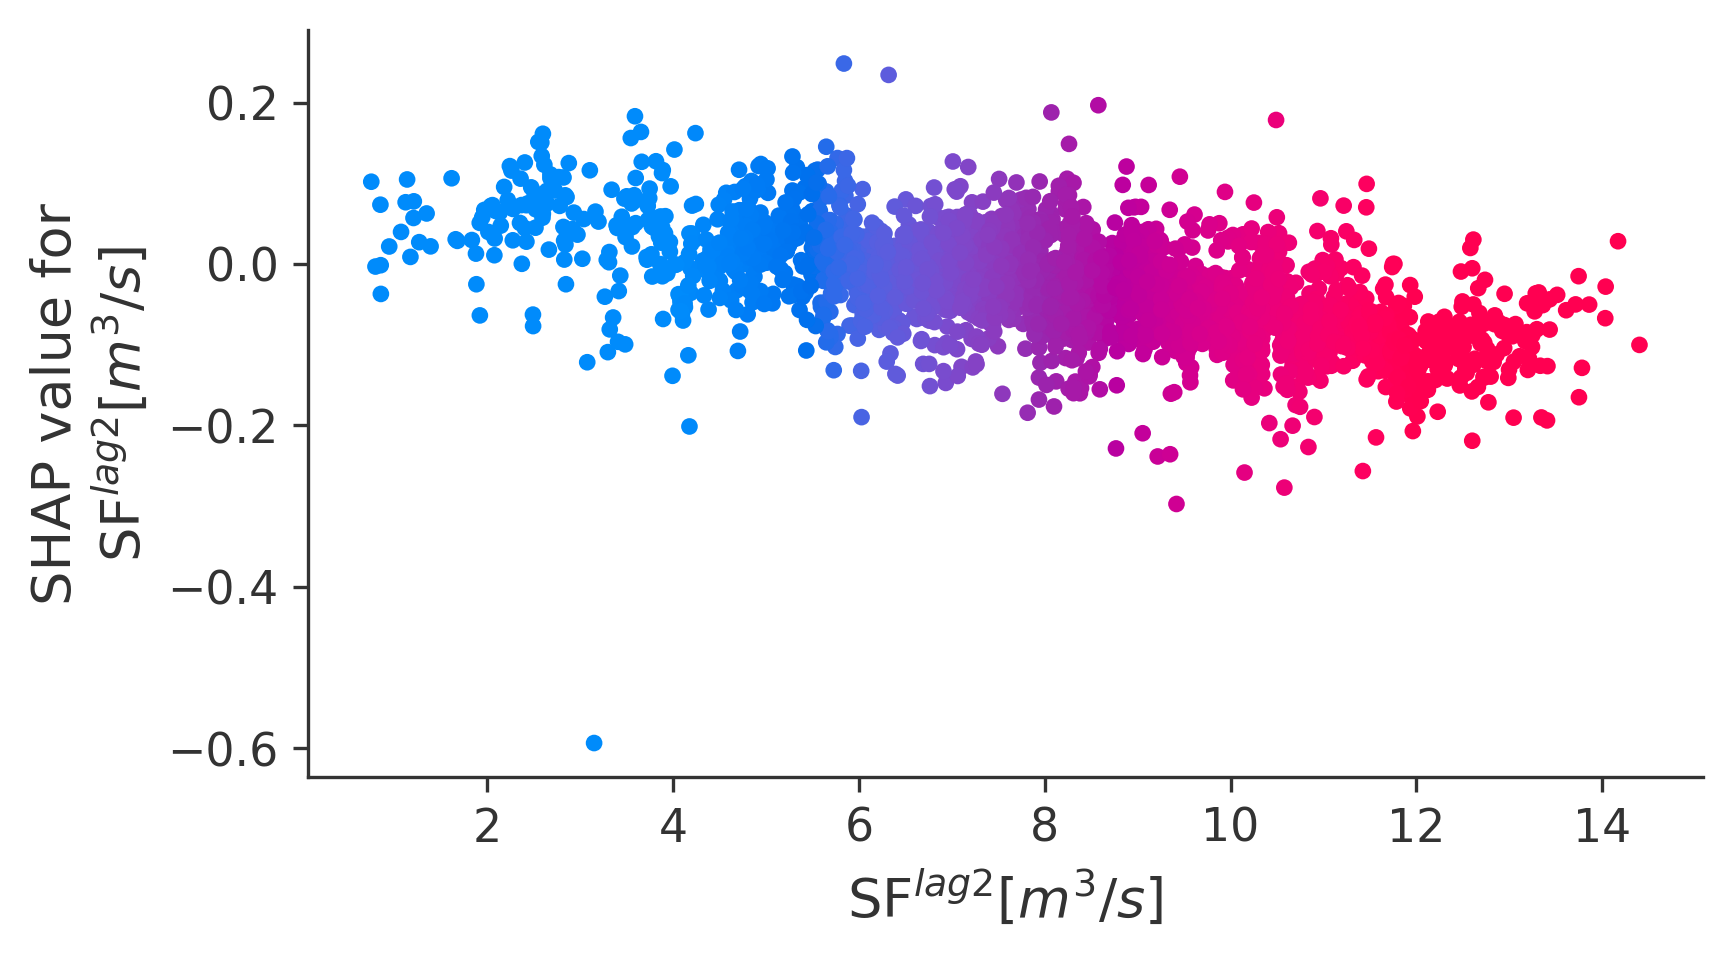

In [89]:
fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

   
shap.dependence_plot('SF$^{lag2} [m^3/s]$',shap_values, df_AI[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='SF$^{lag2} [m^3/s]$')
plt.savefig(pathto_features_save +str('/SF_Lag2 Hist.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


In [90]:
df_AI.to_excel(pathto_save+'/df_AI.xlsx')

# Climate change analysis


# RCP 4.5

In [91]:
def read_data(file_name,base_dir, num_skip_rows):
    df      = os.path.join(base_dir,file_name)
    df_read = pd.read_csv(df, thousands=r',',low_memory=False, skiprows = num_skip_rows)  
    return df_read

def MACA_data(base_dir, file_name):
    data_M_Hist  = []
    data_M_Hist  = read_data(file_name,base_dir, num_skip_rows)

    data_M_Hist.rename(columns = {data_M_Hist.columns[0] : 'Date',     data_M_Hist.columns[1] : 'Tmin[K]', 
                                  data_M_Hist.columns[2] : 'Tmax[K]' , data_M_Hist.columns[3] : 'Precip[mm]'}, \
                                  inplace = True)

    data_M_Hist['Tmin[C]'] = (data_M_Hist['Tmin[K]'] - 273.15).astype(float)
    data_M_Hist['Tmax[C]'] = (data_M_Hist['Tmax[K]'] - 273.15).astype(float)

    data_M_Hist['Tmin[C]'].interpolate(method = 'linear', limit_direction = 'both', inplace =True)
    data_M_Hist['Tmax[C]'].interpolate(method = 'linear', limit_direction = 'both', inplace =True)
    data_M_Hist['Precip[mm]'].interpolate(method = 'linear', limit_direction = 'both', inplace =True)
    return data_M_Hist

num_skip_rows =12
#-------------------------
# RCP 4.5 - M1-Tmax; M5-Precip; M16-Tmin
#-------------------------
base_dir  = r"/home/c0d3b23ak32/Desktop/Model/Code and Data/Downscaled_MACA_Climate_Data/M16_MIROC5_Japan"
file_name = r"RCP_4_5/data.csv"
temp = MACA_data(base_dir, file_name)

df_MACA_RCP45 = pd.DataFrame()
df_MACA_RCP45[['Date','$T_{max}$ [$^oC$]']] = temp[['Date','Tmax[C]']]
df_MACA_RCP45.index = pd.DatetimeIndex(df_MACA_RCP45['Date'])
df_MACA_RCP45.drop(['Date'],axis=1,inplace=True)



base_dir  = r"/home/c0d3b23ak32/Desktop/Model/Code and Data/Downscaled_MACA_Climate_Data/M5_CCSM4_USA"
file_name = r"RCP_4_5/data.csv"
temp = MACA_data(base_dir, file_name)
df_MACA_RCP45['$P$ [mm]'] = temp['Precip[mm]'].values


base_dir  = r"/home/c0d3b23ak32/Desktop/Model/Code and Data/Downscaled_MACA_Climate_Data/M20_NorESM1_M_Norway"
file_name = r"RCP_4_5/data.csv"
temp = MACA_data(base_dir, file_name)
df_MACA_RCP45['$T_{min}$ [$^oC$]'] = temp['Tmin[C]'].values


df_RCP45_MACA = pd.DataFrame()
df_RCP45_MACA['$T_{min}$ [$^oC$]'] = df_MACA_RCP45['$T_{min}$ [$^oC$]'].resample('W').mean()
df_RCP45_MACA['$T_{max}$ [$^oC$]'] = df_MACA_RCP45['$T_{max}$ [$^oC$]'].resample('W').mean().values
df_RCP45_MACA['$P$ [mm]'] = df_MACA_RCP45['$P$ [mm]'].resample('W').sum().values
df_RCP45_MACA.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
count,4906.000000,4906.000000,4906.000000
mean,16.267201,29.449579,15.909449
std,7.614883,7.466808,30.876179
min,-6.800552,2.217379,0.000000
25%,9.809292,23.725248,0.487135
50%,17.204996,30.375417,4.444767
75%,23.368207,35.634299,18.378493
max,30.541171,47.351195,553.350795


In [92]:
df_RCP45_MACA

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
Date,,,
2006-01-01,4.522577,18.357935,2.025701
2006-01-08,4.939085,17.416136,5.733750
2006-01-15,3.693624,14.504327,3.842551
2006-01-22,1.726439,15.845200,27.862270
2006-01-29,6.468373,6.273008,0.000000
...,...,...,...
2099-12-06,12.633186,25.245586,0.000000
2099-12-13,12.576305,20.603505,1.763800
2099-12-20,12.996293,24.901121,28.070110


In [93]:
#Create the  date range of the desired projection 
date_rng = pd.date_range(start='1/1/2006', end='01/03/2100', freq='W', closed='left')
df_future = pd.DataFrame(index=date_rng, 
                         columns=['Month','$T_{min}$ [$^oC$]','$T_{max}$ [$^oC$]','$P$ [mm]',
                                  '$P^{lag1}$ [mm]','$P^{lag2}$ [mm]','SF$^{lag1} [m^3/s]$','SF$^{lag2} [m^3/s]$','SF$[m^3/s]$'])


#From existing columns create the lags from 3 to 7 columns 
df_future['Month'] = df_future.index.month

df_future['$P$ [mm]'] = df_RCP45_MACA['$P$ [mm]']

df_future['$T_{max}$ [$^oC$]'] = df_RCP45_MACA['$T_{max}$ [$^oC$]']

df_future['$T_{min}$ [$^oC$]'] = df_RCP45_MACA['$T_{min}$ [$^oC$]']

df_future['$P^{lag1}$ [mm]'][0] = df_AI['$P$ [mm]']['2005-12-25']

df_future['$P^{lag2}$ [mm]'][0] = df_AI['$P$ [mm]']['2005-12-18']

df_future['SF$^{lag1} [m^3/s]$'][0] = df_AI['SF$[m^3/s]$']['2005-12-25']

df_future['SF$^{lag2} [m^3/s]$'][0] = df_AI['SF$[m^3/s]$']['2005-12-18']

#df_future['SF_comal$^{lag1}$ [$m^3$/s]'][0] = df_AI['SF_comal [$m^3$/s]']['2005-12-25']

#df_future['SF_comal$^{lag2}$ [$m^3$/s]'][0] = df_AI['SF_comal [$m^3$/s]']['2005-12-18']


##########################################################################################
future_x = df_future[['Month','$T_{min}$ [$^oC$]','$T_{max}$ [$^oC$]','$P$ [mm]',
                      '$P^{lag1}$ [mm]','$P^{lag2}$ [mm]','SF$^{lag1} [m^3/s]$',
                      'SF$^{lag2} [m^3/s]$']].iloc[0].to_numpy().reshape(1, -1)
df_future['SF$[m^3/s]$'].iloc[0] = xgb_model_SF.predict(future_x)[0]
##########################################################################################
df_future.head()


i = 0
for row in df_future.itertuples():
    df_future['$P^{lag1}$ [mm]'][i+1] = df_future['$P$ [mm]'].iloc[i]
    
    df_future['$P^{lag2}$ [mm]'][i+1] = df_future['$P^{lag1}$ [mm]'].iloc[i]
    
    df_future['SF$^{lag1} [m^3/s]$'][i+1] = df_future['SF$[m^3/s]$'].iloc[i]
    
    df_future['SF$^{lag2} [m^3/s]$'][i+1] = df_future['SF$^{lag1} [m^3/s]$'].iloc[i]

    #df_future['SF_comal$^{lag1}$ [$m^3$/s]'][i+1] = df_future['SF_comal [$m^3$/s]'].iloc[i]
    
    #df_future['SF_comal$^{lag2}$ [$m^3$/s]'][i+1] = df_future['SF_comal$^{lag1}$ [$m^3$/s]'].iloc[i]
    
    future_x = df_future[['Month','$T_{min}$ [$^oC$]','$T_{max}$ [$^oC$]','$P$ [mm]',
                          '$P^{lag1}$ [mm]','$P^{lag2}$ [mm]','SF$^{lag1} [m^3/s]$',
                          'SF$^{lag2} [m^3/s]$']].iloc[i+1].to_numpy().reshape(1, -1)
    df_future['SF$[m^3/s]$'].iloc[i+1] = xgb_model_SF.predict(future_x)[0]
    i = i+1
    if i == (len(date_rng)-1):
        break

#from out training set
Y_future = df_AI['SF$[m^3/s]$']['2006-01-01':'2020-11-29'].sort_values(ascending=True).to_numpy()

#from or trained model 
Y_future_Pred = df_future['SF$[m^3/s]$']['2006-01-01':'2020-11-29'].sort_values(ascending=True).to_numpy()

rmse = np.sqrt(mean_squared_error(Y_future,Y_future_Pred))
RSQ = r2_score(Y_future,Y_future_Pred)
MAE = np.mean(np.abs(Y_future - Y_future_Pred))
MBE = np.mean(Y_future - Y_future_Pred)
print("############ Model Validation_4.5 ############")
print("RMSE: %0.3f" % rmse,'m')
print("MAE: %0.3f" % MAE,'m')
print("MBE: %0.3f" % MBE,'m')
print("R-squared: %0.3f" % RSQ)
print("########################################")
print(" ")



df_future['SF$[m^3/s]$'] = df_future['SF$[m^3/s]$'].astype(float)
df_future.to_excel(pathto_save + '/df_future_RCP45_Springflow_XGB.xlsx')

df_future['2006-01-01':'2020-11-29'].describe()


############ Model Validation_4.5 ############
RMSE: 0.827 m
MAE: 0.723 m
MBE: 0.050 m
R-squared: 0.871
########################################
 


,Month,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,779.000000,779.000000,779.000000,779.000000,779.000000
mean,6.500642,15.031280,27.842688,17.305281,7.752330
std,3.437423,7.537992,7.354264,34.542654,1.741733
min,1.000000,-6.800552,4.884607,0.000000,4.220244
25%,4.000000,9.024826,22.257388,0.515217,6.763049
50%,7.000000,16.174973,29.123791,4.728953,7.540621
75%,9.000000,22.301069,33.785898,20.323073,8.564221
max,12.000000,26.235337,40.653075,516.568210,13.575459


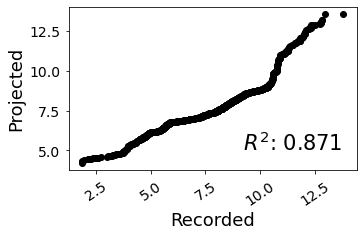

In [94]:

fig, ax1 = plt.subplots(1,1, figsize=(5,3.5))
# ##################################################################################################
ax1.scatter(df_AI['SF$[m^3/s]$']['2006-01-01':'2020-11-29'].sort_values(ascending=True).to_numpy(), 
            df_future['SF$[m^3/s]$']['2006-01-01':'2020-11-29'].sort_values(ascending=True).to_numpy(), 
            marker='o', color = 'black')

RSQ = np.round((r2_score(df_AI['SF$[m^3/s]$']['2006-01-01':'2020-11-29'].sort_values(ascending=True).to_numpy(), 
            df_future['SF$[m^3/s]$']['2006-01-01':'2020-11-29'].sort_values(ascending=True).to_numpy())),3)

ax1.text(0.95, 0.1, ("$R^2$: %0.3f" % RSQ),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='black', fontsize=21)

ax1.set_xlabel('Recorded', fontsize = 18)
ax1.tick_params(axis = "x", labelsize = 14, rotation=34)
ax1.xaxis.set_tick_params(pad=5)
ax1.set_ylabel('Projected', fontsize = 18)
ax1.tick_params(axis = "y", labelsize = 14)
ax1.yaxis.set_tick_params(pad=5)


plt.tight_layout(pad=1.2)
fig.savefig(pathto_boost_save+ '/Validation_Plot_RCP45_Xgboost.jpg', format='jpeg', dpi=300, bbox_inches='tight')
    

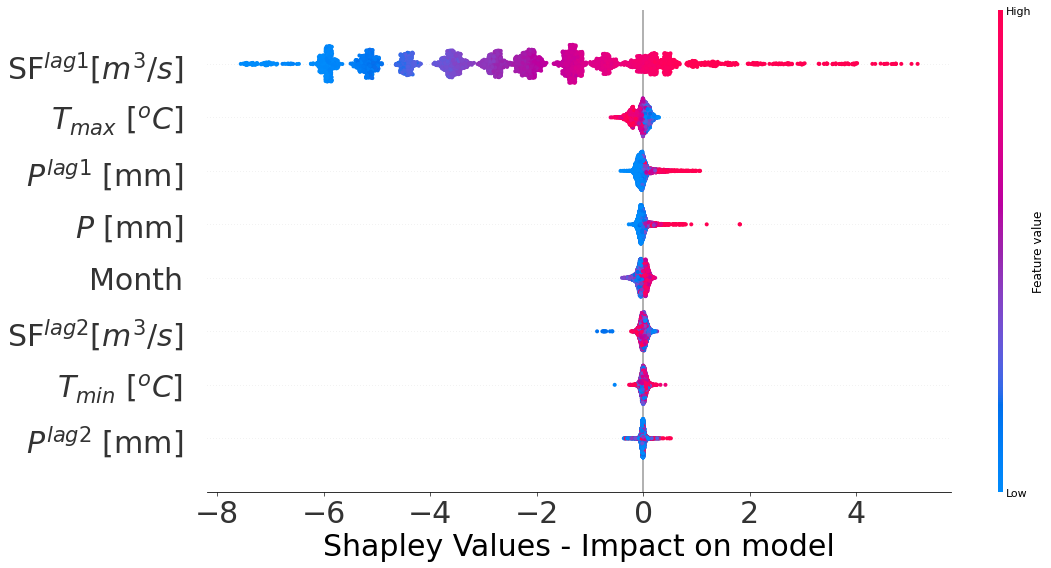

In [95]:
explainer = shap.TreeExplainer(xgb_model_SF)
shap_values = explainer.shap_values(df_future[Features].to_numpy())

shap.summary_plot(shap_values, df_future[Features].to_numpy(), Features, plot_size=(16,8), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout(pad=1.08)
plt.savefig(pathto_features_save+str('/SF - RCP45.pdf'), format='pdf', dpi=300, bbox_inches ='tight')

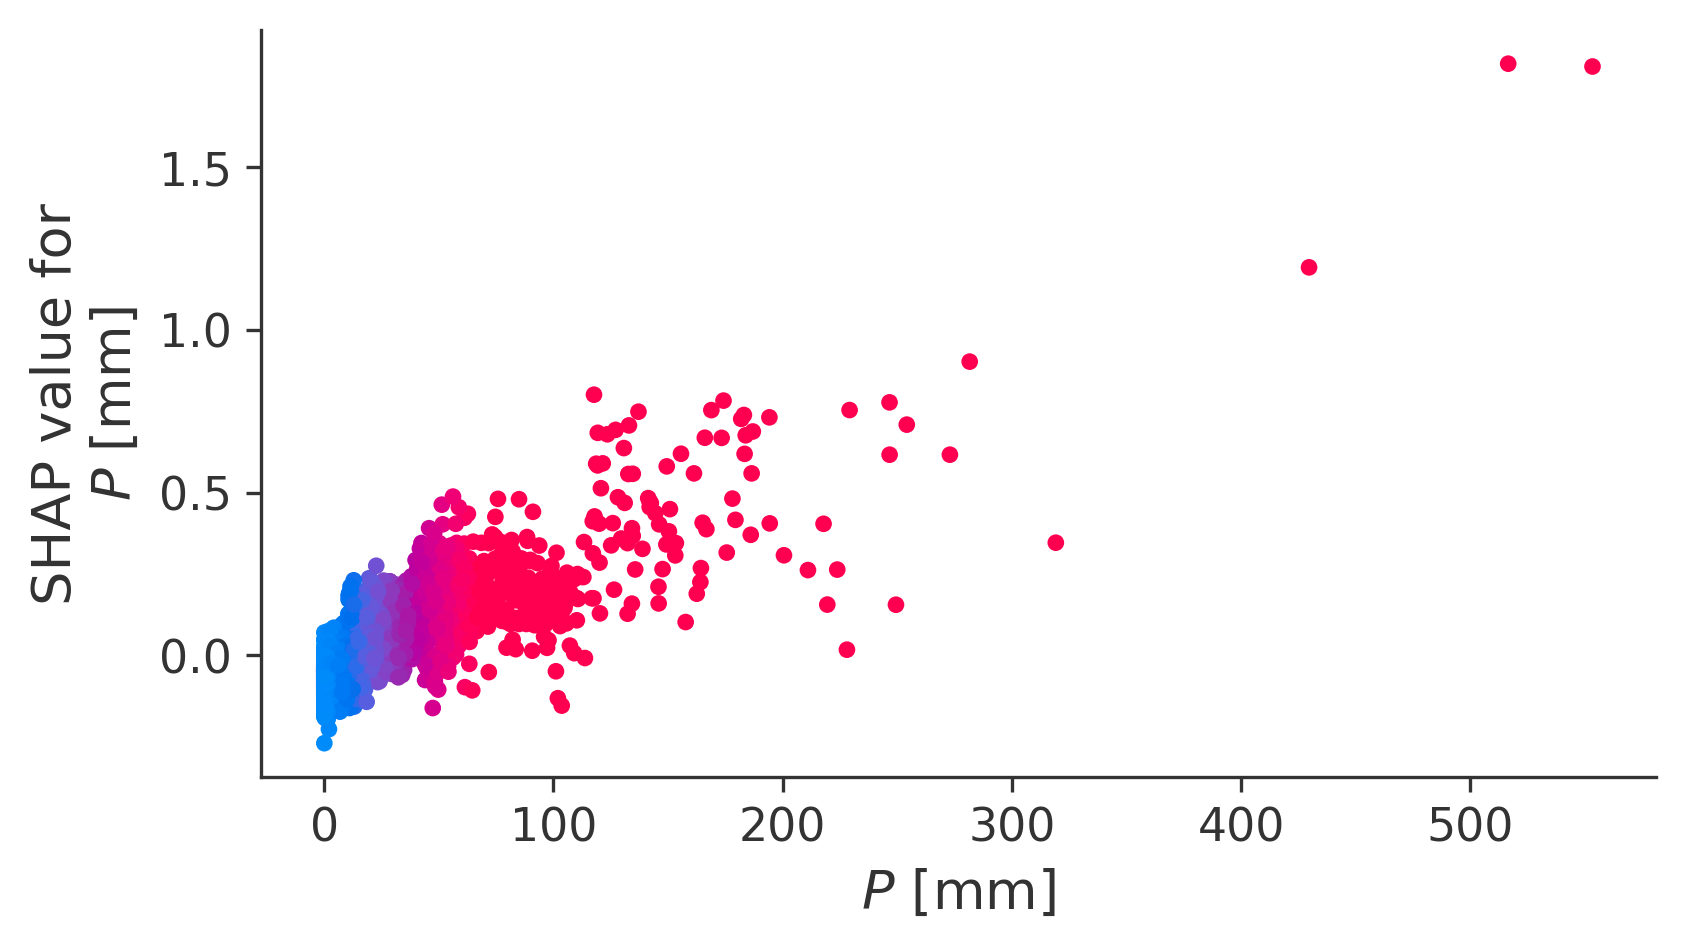

In [96]:
fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

   
shap.dependence_plot('$P$ [mm]',shap_values, df_future[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='$P$ [mm]')
plt.savefig(pathto_features_save +str('/45Pr -.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


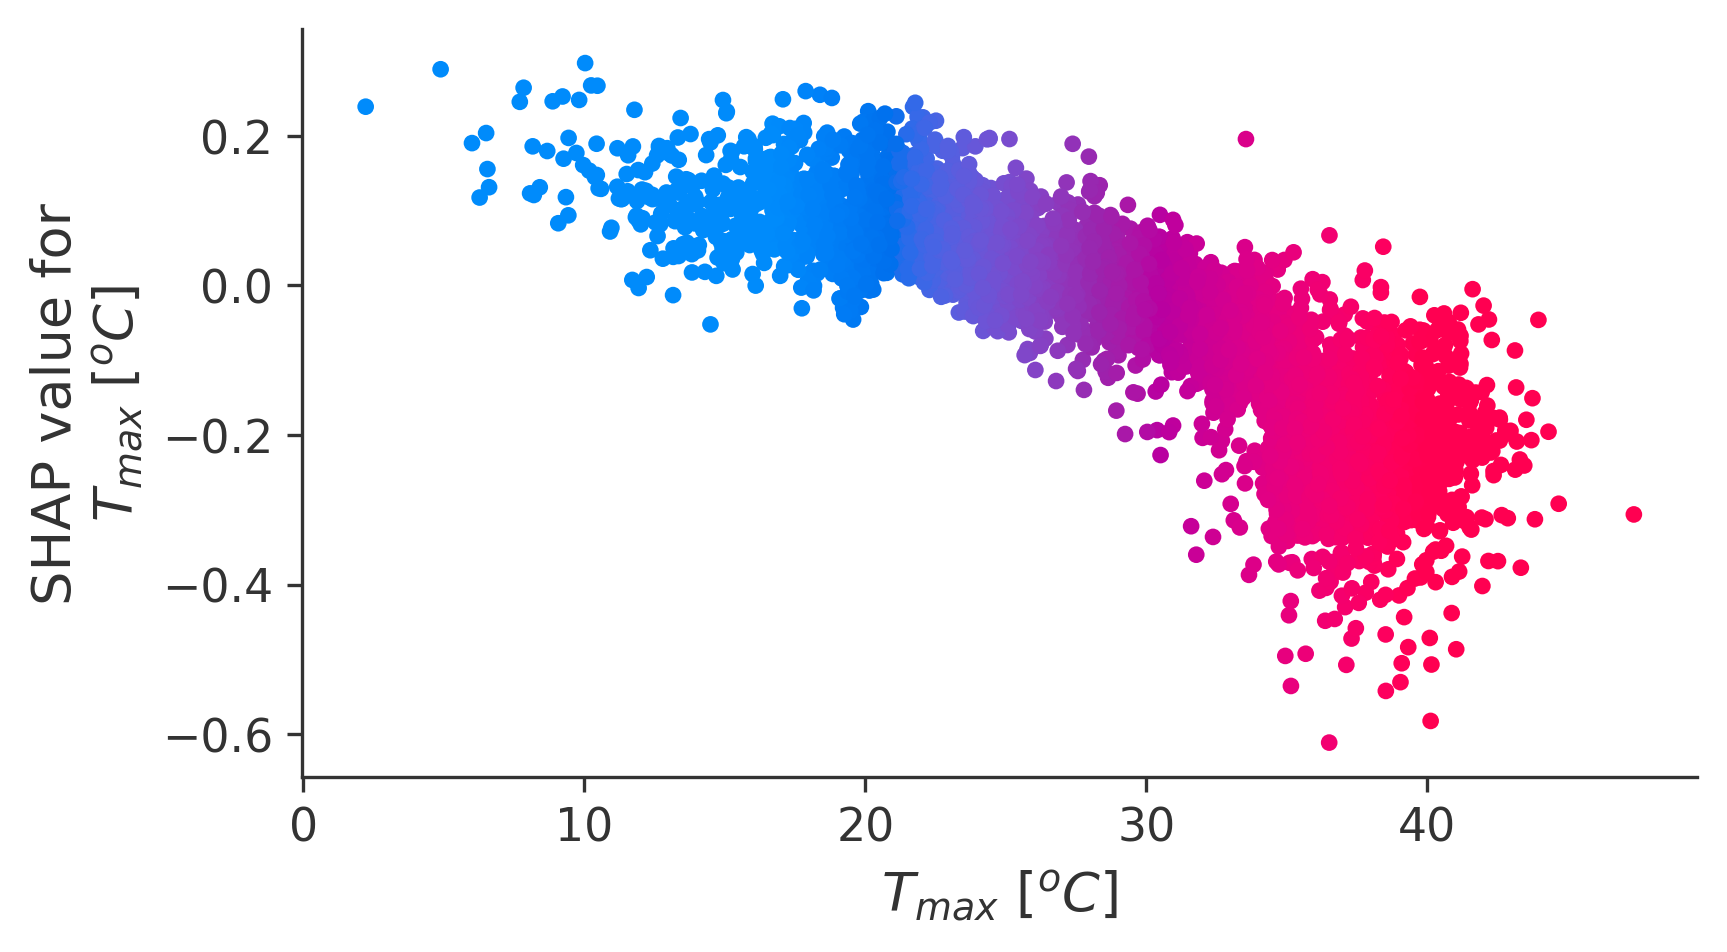

In [97]:

fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

   
shap.dependence_plot('$T_{max}$ [$^oC$]', shap_values, df_future[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='$T_{max}$ [$^oC$]')
plt.savefig(pathto_features_save +str('/45Tmax - Hist.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


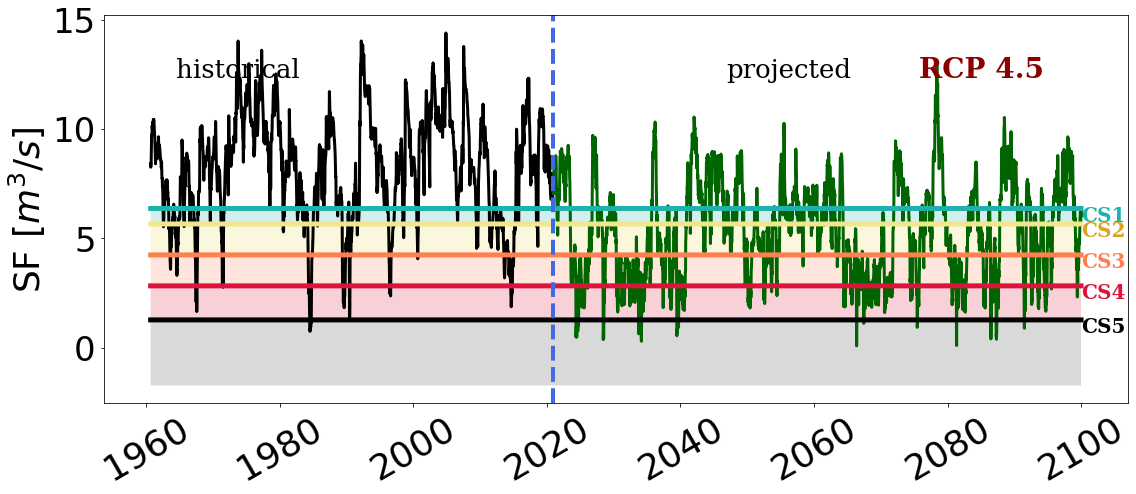

In [98]:

fig, ax1 = plt.subplots(1,1, figsize=(16,7))
# ###################################################################################################
# Springflow levels - Historical + Projections
# ###################################################################################################

#Plot the updated model SF with the exisitng data
ax1.plot(df_AI.index,  df_AI['SF$[m^3/s]$'], '-', color = 'black', lw = 3, label = 'Historical Data')

ax1.plot(df_future['2020-11-29':'2100-01-03'].index,
         df_future['SF$[m^3/s]$']['2020-11-29':'2100-01-03'], '-', 
         color = 'darkgreen', lw = 3, label = 'Future Projection')


temp = pd.concat([df_AI['SF$[m^3/s]$'],df_future['SF$[m^3/s]$']['2020-11-29':'2100-01-03']])



phase1 = np.zeros(len(temp))
phase1[phase1 == 0] = 225*0.028316847
phase2 = np.zeros(len(temp))
phase2[phase2 == 0] = 200*0.028316847
phase3 = np.zeros(len(temp))
phase3[phase3 == 0] = 150*0.028316847
phase4 = np.zeros(len(temp))
phase4[phase4 == 0] = 100*0.028316847
phase5 = np.zeros(len(temp))
phase5[phase5 == 0] = 45*0.028316847



ax1.plot(temp.index, phase1, '-', color='lightseagreen', lw=5, label = 'Critical Stage I')
ax1.plot(temp.index, phase2, '-', color='khaki', lw=5, label = 'Critical Stage II')
ax1.plot(temp.index, phase3, '-', color='coral', lw=5, label = 'Critical Stage III')
ax1.plot(temp.index, phase4, '-', color='crimson', lw=5, label = 'Critical Stage IV')
ax1.plot(temp.index, phase5, '-', color='black', lw=5, label = 'Critical Stage V')


ax1.set_xlabel('', fontsize = 36)
ax1.tick_params(axis = "x", labelsize = 36, rotation=30)
ax1.xaxis.set_tick_params(pad=5)
ax1.set_ylabel('SF $[m^3/s]$', fontsize = 36)
ax1.tick_params(axis = "y", labelsize = 34)
ax1.yaxis.set_tick_params(pad=5)

tw = np.array (temp.index)
plt.fill_between(tw, phase2[0] , phase1[0], alpha=0.20, facecolor='lightseagreen')
plt.fill_between(tw, phase3[0] , phase2[0], alpha=0.3, facecolor='khaki')
plt.fill_between(tw, phase4[0] , phase3[0], alpha=0.20, facecolor='coral')
plt.fill_between(tw, phase5[0] , phase4[0], alpha=0.20, facecolor='crimson')
plt.fill_between(tw,    phase5[0],phase5[0]-3, alpha=0.15, facecolor='black')

font = {'family': 'serif', 'color':  'lightseagreen', 'weight': 'bold', 'size': 20} 
plt.text(tw[-1], phase1[0]-0.6, r'CS1', fontdict=font)
font = {'family': 'serif', 'color':  'goldenrod', 'weight': 'bold', 'size': 20} 
plt.text(tw[-1], phase2[0]-0.6, r'CS2', fontdict=font)
font = {'family': 'serif', 'color':  'coral', 'weight': 'bold', 'size': 20} 
plt.text(tw[-1], phase3[0]-0.6, r'CS3', fontdict=font)
font = {'family': 'serif', 'color':  'crimson', 'weight': 'bold', 'size': 20}
plt.text(tw[-1], phase4[0]-0.6, r'CS4', fontdict=font)
font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'size': 20}
plt.text(tw[-1], phase5[0]-0.6, r'CS5', fontdict=font)
font = {'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 28}
plt.text(tw[6000],phase1[0]+6, r'RCP 4.5', fontdict=font)

plt.axvline(x= datetime.datetime(2020, 11, 29), color = 'royalblue', lw = 4, linestyle='--')

font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 26,}      
plt.text(tw[4500],phase1[0]+6, r'projected', fontdict=font)

font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 26,} 
plt.text(tw[200],phase1[0]+6, r'historical', fontdict=font)


#-------------------------------------------- FORMAT -------------------------------------------------------

plt.tight_layout(pad=1.2)
fig.savefig(pathto_boost_save+ '/Decremental_SF_RCP45_XGboost.jpg', format='jpeg', dpi=300, bbox_inches='tight') 

# RCP 8.5

In [99]:
#-------------------------
# RCP 8.5 - M1-Tmax; M5-Precip; M16-Tmin
#-------------------------
base_dir  = r"/home/c0d3b23ak32/Desktop/Model/Code and Data/Downscaled_MACA_Climate_Data/M16_MIROC5_Japan"
file_name = r"RCP_8_5/data.csv"
temp = MACA_data(base_dir, file_name)

df_MACA_RCP85 = pd.DataFrame()
df_MACA_RCP85[['Date','$T_{max}$ [$^oC$]']] = temp[['Date','Tmax[C]']]
df_MACA_RCP85.index = pd.DatetimeIndex(df_MACA_RCP85['Date'])
df_MACA_RCP85.drop(['Date'],axis=1,inplace=True)



base_dir  = r"/home/c0d3b23ak32/Desktop/Model/Code and Data/Downscaled_MACA_Climate_Data/M5_CCSM4_USA"
file_name = r"RCP_8_5/data.csv"
temp = MACA_data(base_dir, file_name)
df_MACA_RCP85['$P$ [mm]'] = temp['Precip[mm]'].values


base_dir  = r"/home/c0d3b23ak32/Desktop/Model/Code and Data/Downscaled_MACA_Climate_Data/M20_NorESM1_M_Norway"
file_name = r"RCP_8_5/data.csv"
temp = MACA_data(base_dir, file_name)
df_MACA_RCP85['$T_{min}$ [$^oC$]'] = temp['Tmin[C]'].values


df_RCP85_MACA = pd.DataFrame()
df_RCP85_MACA['$T_{min}$ [$^oC$]'] = df_MACA_RCP85['$T_{min}$ [$^oC$]'].resample('W').mean()
df_RCP85_MACA['$T_{max}$ [$^oC$]'] = df_MACA_RCP85['$T_{max}$ [$^oC$]'].resample('W').mean().values
df_RCP85_MACA['$P$ [mm]'] = df_MACA_RCP85['$P$ [mm]'].resample('W').sum().values
df_RCP85_MACA.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
count,4906.000000,4906.000000,4906.000000
mean,17.351381,30.211837,15.564499
std,7.483686,7.608645,29.840794
min,-6.817651,6.143688,0.000000
25%,11.219275,24.362871,0.440705
50%,18.236111,31.085125,4.214950
75%,24.107307,36.424864,17.515275
max,32.665800,47.101548,339.089812


In [100]:
#Create the  date range of the desired projection 
date_rng = pd.date_range(start='1/1/2006', end='01/03/2100', freq='W', closed='left')
df_future = pd.DataFrame(index=date_rng, 
                         columns=['Month','$T_{min}$ [$^oC$]','$T_{max}$ [$^oC$]','$P$ [mm]',
                                  '$P^{lag1}$ [mm]','$P^{lag2}$ [mm]','SF$^{lag1} [m^3/s]$','SF$^{lag2} [m^3/s]$','SF$[m^3/s]$'])


#From existing columns create the lags from 3 to 7 columns 
df_future['Month'] = df_future.index.month

df_future['$P$ [mm]'] = df_RCP85_MACA['$P$ [mm]']

df_future['$T_{max}$ [$^oC$]'] = df_RCP85_MACA['$T_{max}$ [$^oC$]']

df_future['$T_{min}$ [$^oC$]'] = df_RCP85_MACA['$T_{min}$ [$^oC$]']

df_future['$P^{lag1}$ [mm]'][0] = df_AI['$P$ [mm]']['2005-12-25']

df_future['$P^{lag2}$ [mm]'][0] = df_AI['$P$ [mm]']['2005-12-18']

df_future['SF$^{lag1} [m^3/s]$'][0] = df_AI['SF$[m^3/s]$']['2005-12-25']

df_future['SF$^{lag2} [m^3/s]$'][0] = df_AI['SF$[m^3/s]$']['2005-12-18']

#df_future['SF_comal$^{lag1}$ [$m^3$/s]'][0] = df_AI['SF_comal [$m^3$/s]']['2005-12-25']

#df_future['SF_comal$^{lag2}$ [$m^3$/s]'][0] = df_AI['SF_comal [$m^3$/s]']['2005-12-18']


##########################################################################################
future_x = df_future[['Month','$T_{min}$ [$^oC$]','$T_{max}$ [$^oC$]','$P$ [mm]',
                      '$P^{lag1}$ [mm]','$P^{lag2}$ [mm]','SF$^{lag1} [m^3/s]$',
                      'SF$^{lag2} [m^3/s]$']].iloc[0].to_numpy().reshape(1, -1)
df_future['SF$[m^3/s]$'].iloc[0] = xgb_model_SF.predict(future_x)[0]
##########################################################################################



i = 0
for row in df_future.itertuples():
    df_future['$P^{lag1}$ [mm]'][i+1] = df_future['$P$ [mm]'].iloc[i]
    
    df_future['$P^{lag2}$ [mm]'][i+1] = df_future['$P^{lag1}$ [mm]'].iloc[i]
    
    df_future['SF$^{lag1} [m^3/s]$'][i+1] = df_future['SF$[m^3/s]$'].iloc[i]
    
    df_future['SF$^{lag2} [m^3/s]$'][i+1] = df_future['SF$^{lag1} [m^3/s]$'].iloc[i]

    #df_future['SF_comal$^{lag1}$ [$m^3$/s]'][i+1] = df_future['SF_comal [$m^3$/s]'].iloc[i]
    
    #df_future['SF_comal$^{lag2}$ [$m^3$/s]'][i+1] = df_future['SF_comal$^{lag1}$ [$m^3$/s]'].iloc[i]
    
    future_x = df_future[['Month','$T_{min}$ [$^oC$]','$T_{max}$ [$^oC$]','$P$ [mm]',
                          '$P^{lag1}$ [mm]','$P^{lag2}$ [mm]','SF$^{lag1} [m^3/s]$',
                          'SF$^{lag2} [m^3/s]$']].iloc[i+1].to_numpy().reshape(1, -1)
    df_future['SF$[m^3/s]$'].iloc[i+1] = xgb_model_SF.predict(future_x)[0]
    i = i+1
    if i == (len(date_rng)-1):
        break

#from out training set
Y_future = df_AI['SF$[m^3/s]$']['2006-01-01':'2020-11-29'].sort_values(ascending=True).to_numpy()

#from or trained model 
Y_future_Pred = df_future['SF$[m^3/s]$']['2006-01-01':'2020-11-29'].sort_values(ascending=True).to_numpy()

rmse = np.sqrt(mean_squared_error(Y_future,Y_future_Pred))
RSQ = r2_score(Y_future,Y_future_Pred)
MAE = np.mean(np.abs(Y_future - Y_future_Pred))
MBE = np.mean(Y_future - Y_future_Pred)
print("############ Model Validation_8.5 ############")
print("RMSE: %0.3f" % rmse,'m')
print("MAE: %0.3f" % MAE,'m')
print("MBE: %0.3f" % MBE,'m')
print("R-squared: %0.3f" % RSQ)
print("########################################")
print(" ")


df_future['SF$[m^3/s]$'] = df_future['SF$[m^3/s]$'].astype(float)

df_future.to_excel(pathto_save + '/df_future_RCP85_Springflow_XGB.xlsx')

df_future['2006-01-01':'2020-11-29'].describe()

############ Model Validation_8.5 ############
RMSE: 0.404 m
MAE: 0.323 m
MBE: 0.107 m
R-squared: 0.969
########################################
 


,Month,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,779.000000,779.000000,779.000000,779.000000,779.000000
mean,6.500642,15.365863,27.658123,17.178359,7.695146
std,3.437423,7.630796,7.532486,33.693958,2.118299
min,1.000000,-4.879802,6.143688,0.000000,2.657701
25%,4.000000,9.085962,21.728880,0.732739,5.911218
50%,7.000000,16.155926,28.664772,5.235627,7.566133
75%,9.000000,22.832005,33.937865,18.575705,9.188587
max,12.000000,27.713739,40.850296,336.001998,14.302826


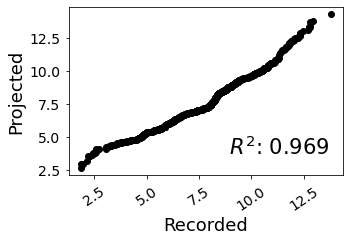

In [101]:

fig, ax1 = plt.subplots(1,1, figsize=(5,3.5))
# ##################################################################################################
ax1.scatter(df_AI['SF$[m^3/s]$']['2006-01-01':'2020-11-29'].sort_values(ascending=True).to_numpy(), 
            df_future['SF$[m^3/s]$']['2006-01-01':'2020-11-29'].sort_values(ascending=True).to_numpy(), 
            marker='o', color = 'black')

RSQ = np.round((r2_score(df_AI['SF$[m^3/s]$']['2006-01-01':'2020-11-29'].sort_values(ascending=True).to_numpy(), 
            df_future['SF$[m^3/s]$']['2006-01-01':'2020-11-29'].sort_values(ascending=True).to_numpy())),3)

ax1.text(0.95, 0.1, ("$R^2$: %0.3f" % RSQ),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='black', fontsize=21)

ax1.set_xlabel('Recorded', fontsize = 18)
ax1.tick_params(axis = "x", labelsize = 14, rotation=34)
ax1.xaxis.set_tick_params(pad=5)
ax1.set_ylabel('Projected', fontsize = 18)
ax1.tick_params(axis = "y", labelsize = 14)
ax1.yaxis.set_tick_params(pad=5)


plt.tight_layout(pad=1.2)
fig.savefig(pathto_boost_save+ '/Validation_Plot_RCP85_Xgboost.jpg', format='jpeg', dpi=300, bbox_inches='tight')
    

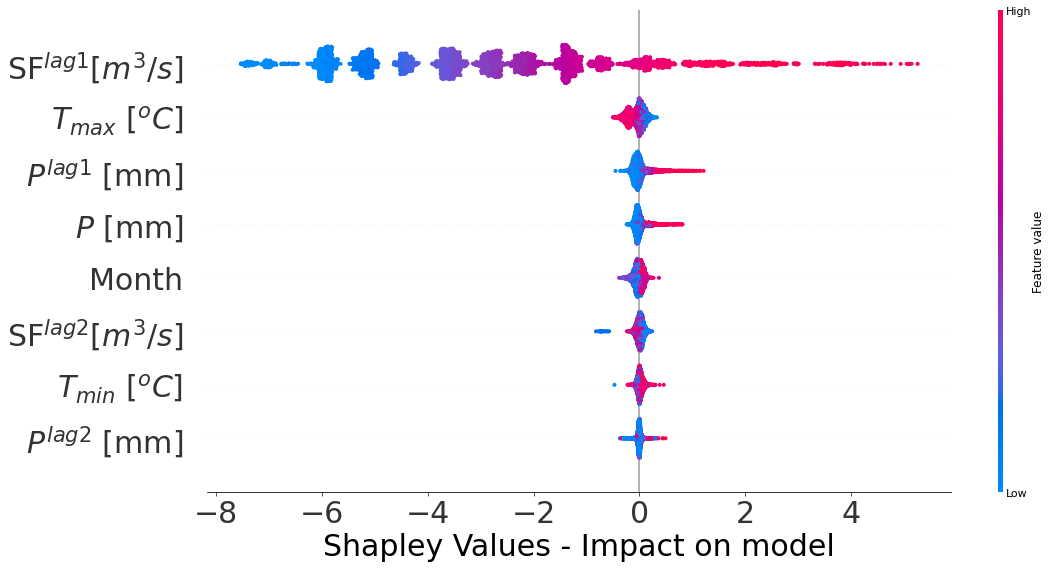

In [102]:
explainer = shap.TreeExplainer(xgb_model_SF)
shap_values = explainer.shap_values(df_future[Features].to_numpy())

shap.summary_plot(shap_values, df_future[Features].to_numpy(), Features, plot_size=(16,8), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout(pad=1.08)
plt.savefig(pathto_features_save+str('/SF - RCP85.pdf'), format='pdf', dpi=300, bbox_inches ='tight')

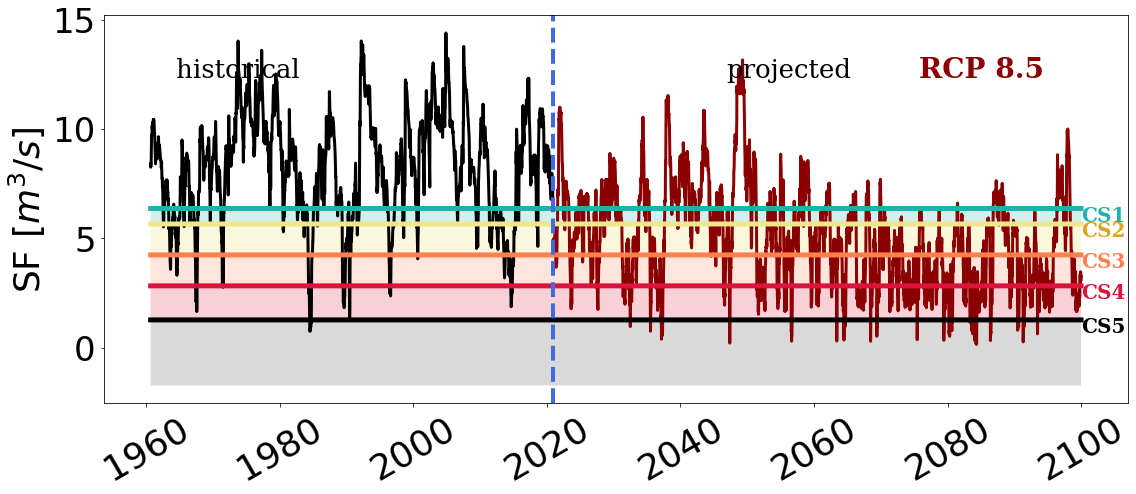

In [103]:

fig, ax1 = plt.subplots(1,1, figsize=(16,7))
# ###################################################################################################
# Springflow levels - Historical + Projections
# ###################################################################################################

#Plot the updated model SF with the exisitng data
ax1.plot(df_AI.index,  df_AI['SF$[m^3/s]$'], '-', color = 'black', lw = 3, label = 'Historical Data')

ax1.plot(df_future['2020-11-29':'2100-01-03'].index,
         df_future['SF$[m^3/s]$']['2020-11-29':'2100-01-03'], '-', 
         color = 'darkred', lw = 3, label = 'Future Projection')


temp = pd.concat([df_AI['SF$[m^3/s]$'],df_future['SF$[m^3/s]$']['2020-11-29':'2100-01-03']])



phase1 = np.zeros(len(temp))
phase1[phase1 == 0] = 225*0.028316847
phase2 = np.zeros(len(temp))
phase2[phase2 == 0] = 200*0.028316847
phase3 = np.zeros(len(temp))
phase3[phase3 == 0] = 150*0.028316847
phase4 = np.zeros(len(temp))
phase4[phase4 == 0] = 100*0.028316847
phase5 = np.zeros(len(temp))
phase5[phase5 == 0] = 45*0.028316847



ax1.plot(temp.index, phase1, '-', color='lightseagreen', lw=5, label = 'Critical Stage I')
ax1.plot(temp.index, phase2, '-', color='khaki', lw=5, label = 'Critical Stage II')
ax1.plot(temp.index, phase3, '-', color='coral', lw=5, label = 'Critical Stage III')
ax1.plot(temp.index, phase4, '-', color='crimson', lw=5, label = 'Critical Stage IV')
ax1.plot(temp.index, phase5, '-', color='black', lw=5, label = 'Critical Stage V')


ax1.set_xlabel('', fontsize = 36)
ax1.tick_params(axis = "x", labelsize = 36, rotation=30)
ax1.xaxis.set_tick_params(pad=5)
ax1.set_ylabel('SF $[m^3/s]$', fontsize = 36)
ax1.tick_params(axis = "y", labelsize = 34)
ax1.yaxis.set_tick_params(pad=5)

tw = np.array (temp.index)
plt.fill_between(tw, phase2[0] , phase1[0], alpha=0.20, facecolor='lightseagreen')
plt.fill_between(tw, phase3[0] , phase2[0], alpha=0.3, facecolor='khaki')
plt.fill_between(tw, phase4[0] , phase3[0], alpha=0.20, facecolor='coral')
plt.fill_between(tw, phase5[0] , phase4[0], alpha=0.20, facecolor='crimson')
plt.fill_between(tw,    phase5[0],phase5[0]-3, alpha=0.15, facecolor='black')

font = {'family': 'serif', 'color':  'lightseagreen', 'weight': 'bold', 'size': 20} 
plt.text(tw[-1], phase1[0]-0.6, r'CS1', fontdict=font)
font = {'family': 'serif', 'color':  'goldenrod', 'weight': 'bold', 'size': 20} 
plt.text(tw[-1], phase2[0]-0.6, r'CS2', fontdict=font)
font = {'family': 'serif', 'color':  'coral', 'weight': 'bold', 'size': 20} 
plt.text(tw[-1], phase3[0]-0.6, r'CS3', fontdict=font)
font = {'family': 'serif', 'color':  'crimson', 'weight': 'bold', 'size': 20}
plt.text(tw[-1], phase4[0]-0.6, r'CS4', fontdict=font)
font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'size': 20}
plt.text(tw[-1], phase5[0]-0.6, r'CS5', fontdict=font)
font = {'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 28}
plt.text(tw[6000],phase1[0]+6, r'RCP 8.5', fontdict=font)

plt.axvline(x= datetime.datetime(2020, 11, 29), color = 'royalblue', lw = 4, linestyle='--')

font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 26,}      
plt.text(tw[4500],phase1[0]+6, r'projected', fontdict=font)

font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 26,} 
plt.text(tw[200],phase1[0]+6, r'historical', fontdict=font)


#-------------------------------------------- FORMAT -------------------------------------------------------

plt.tight_layout(pad=1.2)
fig.savefig(pathto_boost_save+ '/Decremental_SF_RCP85_XGboost.jpg', format='jpeg', dpi=300, bbox_inches='tight') 

In [104]:
df_AI = pd.DataFrame()

df_AI['$T_{min}$ [$^oC$]'] = df_hist_climate_NOAA['$T_{min}$ [$^oC$]'].resample('M').mean()
df_AI['$T_{max}$ [$^oC$]'] = df_hist_climate_NOAA['$T_{max}$ [$^oC$]'].resample('M').mean()
df_AI['$P$ [mm]'] = df_hist_climate_NOAA['$P$ [mm]'].resample('M').sum()

df_AI = (df_AI[(df_AI.index>='1958-12-31')&(df_AI.index < '2020-12-31')])
df_AI

df_AI.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
count,744.000000,744.000000,744.000000
mean,14.750960,26.726042,66.756253
std,7.177055,6.689196,67.076340
min,-0.250896,11.326165,0.000000
25%,8.199565,20.830795,19.050000
50%,15.175926,27.546296,48.514000
75%,21.842593,32.689815,89.662000
max,25.806452,38.620072,458.978000


# Check the evaporation relationship

In [105]:
# TerraClimate Data at Cibolo
base_dir = r"/home/c0d3b23ak32/Documents/Dr Chakraborty/Nature Manuscript/Data and Models/TerraClimate_Data"
###################################################################################################
filename = r"ETa_CibolaNC_TerraClimate.csv"
df_ETa = read_tabular_data(filename, base_dir)
df_ETa = df_ETa.rename(columns = \
                       {'(mm) Actual ET (TerraClimate) at -98.7092E,29.7839N, 1958-01-01 to 2019-12-31' : \
                        '$ET$ [mm]'})

df_ETa.index = pd.DatetimeIndex(df_ETa['DateTime'])
df_ETa.drop('DateTime',axis=1,inplace=True)
###################################################################################################
filename = r"ETo_CibolaNC_TerraClimate.csv"
df_ETo = read_tabular_data(filename, base_dir)
df_ETo = df_ETo.rename(columns = \
                       {'(mm) Grass Ref ET (TerraClimate) at -98.7092E,29.7839N, 1958-01-01 to 2019-12-31' : \
                        '$ET_o$ [mm]'})

df_ETo.index = pd.DatetimeIndex(df_ETo['DateTime'])
df_ETo.drop('DateTime',axis=1,inplace=True)
###################################################################################################

###################################################################################################
filename = r"Sm_CibolaNC_TerraClimate.csv"
df_Sm = read_tabular_data(filename, base_dir)
df_Sm = df_Sm.rename(columns = \
                       {'(mm) Soil Moisture (TerraClimate) at -98.7092E,29.7839N, 1958-01-01 to 2019-12-31' : \
                        'SM [mm]'})


df_Sm.index = pd.DatetimeIndex(df_Sm['DateTime'])
df_Sm.drop('DateTime',axis=1,inplace=True)
###################################################################################################



# df_CibolaNC = pd.concat([df_Rd,df_Ta,df_Pr,df_u2,df_ETo,df_ETa,df_Sm,df_Rw],axis=1)
df_AI2 = pd.concat([df_ETo,df_ETa,df_Sm],axis=1)
df_AI2.describe()


,$ET_o$ [mm],$ET$ [mm],SM [mm]
count,744.000000,744.000000,744.000000
mean,126.563038,68.334140,64.604301
std,48.512946,38.981623,54.978794
min,41.000000,1.200000,7.700000
25%,77.400000,41.000000,22.875000
50%,125.700000,62.400000,43.900000
75%,168.675000,92.500000,90.900000
max,224.700000,183.800000,238.200000


In [106]:
#df_AI['$R_w$ [mm]'] = df_AI2['$R_w$ [mm]'].to_numpy()
df_AI['SM [mm]'] = df_AI2['SM [mm]'].to_numpy()
df_AI['$ET$ [mm]'] = df_AI2['$ET$ [mm]'].to_numpy()
df_AI


,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SM [mm],$ET$ [mm]
DATE,,,,,
1958-12-31,3.888889,16.236559,27.178,183.9,73.2
1959-01-31,3.763441,15.017921,13.208,218.5,66.5
1959-02-28,7.281746,17.162698,63.500,196.2,77.5
1959-03-31,8.566308,22.526882,3.302,145.2,86.5
1959-04-30,12.981481,24.611111,64.770,134.9,143.3
...,...,...,...,...,...
2020-07-31,25.143369,37.598566,4.064,37.9,32.8
2020-08-31,24.444444,37.849462,22.860,32.3,34.8
2020-09-30,20.462963,31.666667,78.486,30.8,110.4


In [107]:


#Data is Transformed to  Monthly mean from daily data and truncated 
SF_Data = SF_data.resample('M').mean()
SF_Data


#df_AI = (df_AI[(df_AI.index >= '1956-05-27') & (df_AI.index <= '2020-06-07')])
#df_AI

df_AI['SF$[m^3/s]$'] = (SF_Data[(SF_Data.index >= '1960-01-01')& (SF_Data.index <= '2020-12-31')])




df_AI.describe()



,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SM [mm],$ET$ [mm],SF$[m^3/s]$
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,14.750960,26.726042,66.756253,64.604301,68.334140,8.298454
std,7.177055,6.689196,67.076340,54.978794,38.981623,2.362379
min,-0.250896,11.326165,0.000000,7.700000,1.200000,0.927548
25%,8.199565,20.830795,19.050000,22.875000,41.000000,6.739905
50%,15.175926,27.546296,48.514000,43.900000,62.400000,8.489020
75%,21.842593,32.689815,89.662000,90.900000,92.500000,9.968484
max,25.806452,38.620072,458.978000,238.200000,183.800000,13.627033


In [108]:
# Pumping patterns is hypothesized to be associated with the month
df_AI['Month'] = df_AI.index.month 

# There could be some lag effects in the hydroclimatic behavior for Karst aquifers
df_AI['$T_{max}^{lag1}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(1)
df_AI['$T_{max}^{lag2}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(2)

df_AI['$T_{min}^{lag1}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(1)
df_AI['$T_{min}^{lag2}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(2)

df_AI['$P^{lag1}$ [mm]'] = df_AI['$P$ [mm]'].shift(1)
df_AI['$P^{lag2}$ [mm]'] = df_AI['$P$ [mm]'].shift(2)

df_AI['SF$^{lag1} [m^3/s]$'] = df_AI['SF$[m^3/s]$'].shift(1)
df_AI['SF$^{lag2} [m^3/s]$'] = df_AI['SF$[m^3/s]$'].shift(2)



df_AI.dropna(inplace=True)
df_AI.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SM [mm],$ET$ [mm],SF$[m^3/s]$,Month,$T_{max}^{lag1}$ [$^oC$],$T_{max}^{lag2}$ [$^oC$],$T_{min}^{lag1}$ [$^oC$],$T_{min}^{lag2}$ [$^oC$],$P^{lag1}$ [mm],$P^{lag2}$ [mm],SF$^{lag1} [m^3/s]$,SF$^{lag2} [m^3/s]$
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,14.780407,26.755958,66.881760,64.236119,68.330054,8.295130,6.500000,26.741731,26.724317,14.768413,14.752642,66.849240,66.877995,8.298328,8.300839
std,7.164226,6.673210,67.122125,54.585004,39.033727,2.364693,3.447211,6.686972,6.697488,7.175217,7.186258,67.142301,67.120703,2.364691,2.365064
min,-0.250896,11.326165,0.000000,7.700000,1.200000,0.927548,1.000000,11.326165,11.326165,-0.250896,-0.250896,0.000000,0.000000,0.927548,0.927548
25%,8.244048,20.864695,19.113500,22.825000,41.000000,6.738958,4.000000,20.846774,20.807796,8.216099,8.182924,19.050000,19.113500,6.738958,6.738958
50%,15.200119,27.568100,48.514000,43.650000,62.300000,8.485000,6.500000,27.568100,27.546296,15.200119,15.175926,48.514000,48.514000,8.489020,8.491342
75%,21.861111,32.699074,89.662000,90.400000,92.700000,9.973839,9.000000,32.699074,32.699074,21.861111,21.861111,89.662000,89.662000,9.973839,9.973839
max,25.806452,38.620072,458.978000,238.200000,183.800000,13.627033,12.000000,38.620072,38.620072,25.806452,25.806452,458.978000,458.978000,13.627033,13.627033


# Feature Engineering and training

In [109]:

Features = ['Month','$T_{min}$ [$^oC$]','$T_{max}$ [$^oC$]','$P$ [mm]',
            '$P^{lag1}$ [mm]','$P^{lag2}$ [mm]','SM [mm]','$ET$ [mm]',
            'SF$^{lag1} [m^3/s]$','SF$^{lag2} [m^3/s]$']


Target = ['SF$[m^3/s]$']


#Take the tain set till 2005 and test set from 2006 till 2020

df_AI_Train = df_AI['1946-09-29':'2005-12-31']
df_AI_Test = df_AI['2006-01-01':'2020-11-29']

#Create Independent and dependent variable for machine learning
X = df_AI[Features].to_numpy()
Y = df_AI[Target].to_numpy()
test_X = df_AI_Test[Features].iloc[0].to_numpy().reshape(1, -1)

train_X = df_AI_Train[Features].to_numpy()
train_y = df_AI_Train[Target].to_numpy()

xgb_model_SF = XGBRegressor(**params)
xgb_model_SF.fit(train_X, train_y)
Y_Train_Pred = xgb_model_SF.predict(train_X)



rmse = np.sqrt(mean_squared_error(train_y,Y_Train_Pred))
RSQ = r2_score(train_y,Y_Train_Pred)
MAE = np.mean(np.abs(train_y - Y_Train_Pred))
MBE = np.mean(train_y - Y_Train_Pred)
print("############ Model Accuracy Xgboost -Train ############")
print("RMSE: %0.3f" % rmse,'m')
print("MAE: %0.3f" % MAE,'m')
print("MBE: %0.3f" % MBE,'m')
print("R-squared: %0.3f" % RSQ)
print("########################################")
print(" ")

#################################################################################################
# Make predictions on Testing data and Test model accuracy
#################################################################################################
df_AI_Test['SF$^{pred} [m^3/s]$'] = 0
Test_X = df_AI_Test[Features].iloc[0].to_numpy().reshape(1, -1)
df_AI_Test['SF$^{pred} [m^3/s]$'].iloc[0] = xgb_model_SF.predict(Test_X)[0]

i = 0
for row in df_AI_Test.itertuples():
    df_AI_Test['SF$^{lag1} [m^3/s]$'][i+1] = df_AI_Test['SF$^{pred} [m^3/s]$'].iloc[i]
    
    df_AI_Test['SF$^{lag2} [m^3/s]$'][i+1] = df_AI_Test['SF$^{lag1} [m^3/s]$'].iloc[i]
    
    Test_X = df_AI_Test[Features].iloc[i+1].to_numpy().reshape(1, -1)
    df_AI_Test['SF$^{pred} [m^3/s]$'].iloc[i+1] = xgb_model_SF.predict(Test_X)[0]
    i = i+1
    if i == (len(df_AI_Test)-1):
        break

rmse = np.sqrt(mean_squared_error(df_AI_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy(),
                                  df_AI_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy()))
RSQ = r2_score(df_AI_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy(),
               df_AI_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy())
MAE = np.mean(np.abs(df_AI_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy() - 
                     df_AI_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy()))
MBE = np.mean(df_AI_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy() - 
              df_AI_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy())
print("############ Model Accuracy XGBoost -Test ############")
print("RMSE: %0.3f" % rmse,'m')
print("MAE: %0.3f" % MAE,'m')
print("MBE: %0.3f" % MBE,'m')
print("R-squared: %0.3f" % RSQ)
print("########################################")
print(" ")


############ Model Accuracy Xgboost -Train ############
RMSE: 0.001 m
MAE: 2.657 m
MBE: -0.000 m
R-squared: 1.000
########################################
 
############ Model Accuracy XGBoost -Test ############
RMSE: 1.144 m
MAE: 0.840 m
MBE: 0.836 m
R-squared: 0.750
########################################
 


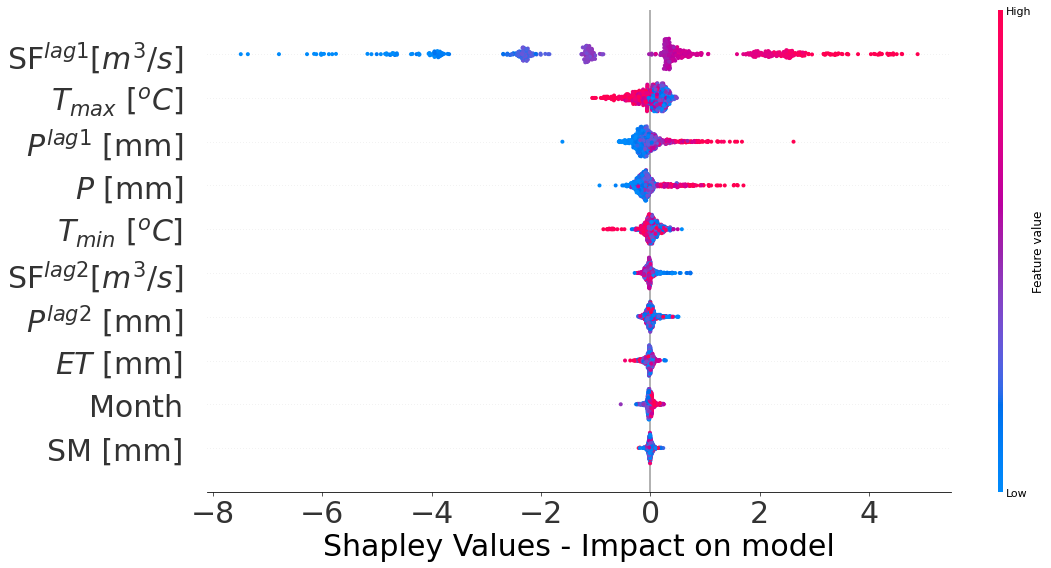

In [110]:
explainer = shap.TreeExplainer(xgb_model_SF)
shap_values = explainer.shap_values(df_AI[Features].to_numpy())

shap.summary_plot(shap_values, df_AI[Features].to_numpy(), Features, plot_size=(16,8), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout(pad=1.08)
plt.savefig(pathto_save +str('/Feature Importance ET-SM- SF -_XGBoost.pdf'), format='pdf', dpi=300, bbox_inches ='tight')

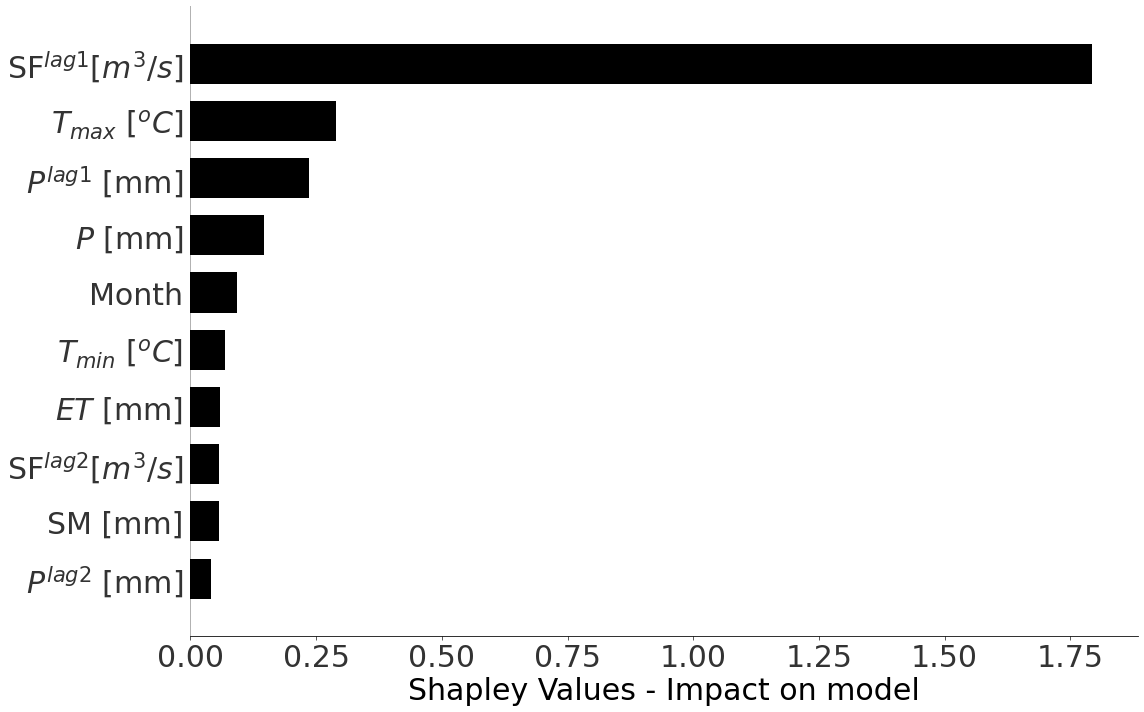

In [111]:
#################################################################################################
# Update Model SpringFLow Model
#################################################################################################20
#With the whole data from 1946 -2020
xgb_model_SF = xgb_model_SF.fit(X, Y)

explainer = shap.TreeExplainer(xgb_model_SF)
shap_values = explainer.shap_values(df_AI[Features].to_numpy())

shap.summary_plot(shap_values, df_AI[Features].to_numpy(), Features, plot_size=(16,10), show=False, 
                  plot_type = "bar", color = "black")
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout(pad=1.08)
plt.savefig(pathto_save + str('/Feature Importances SMET- SF_Comal - Hist.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


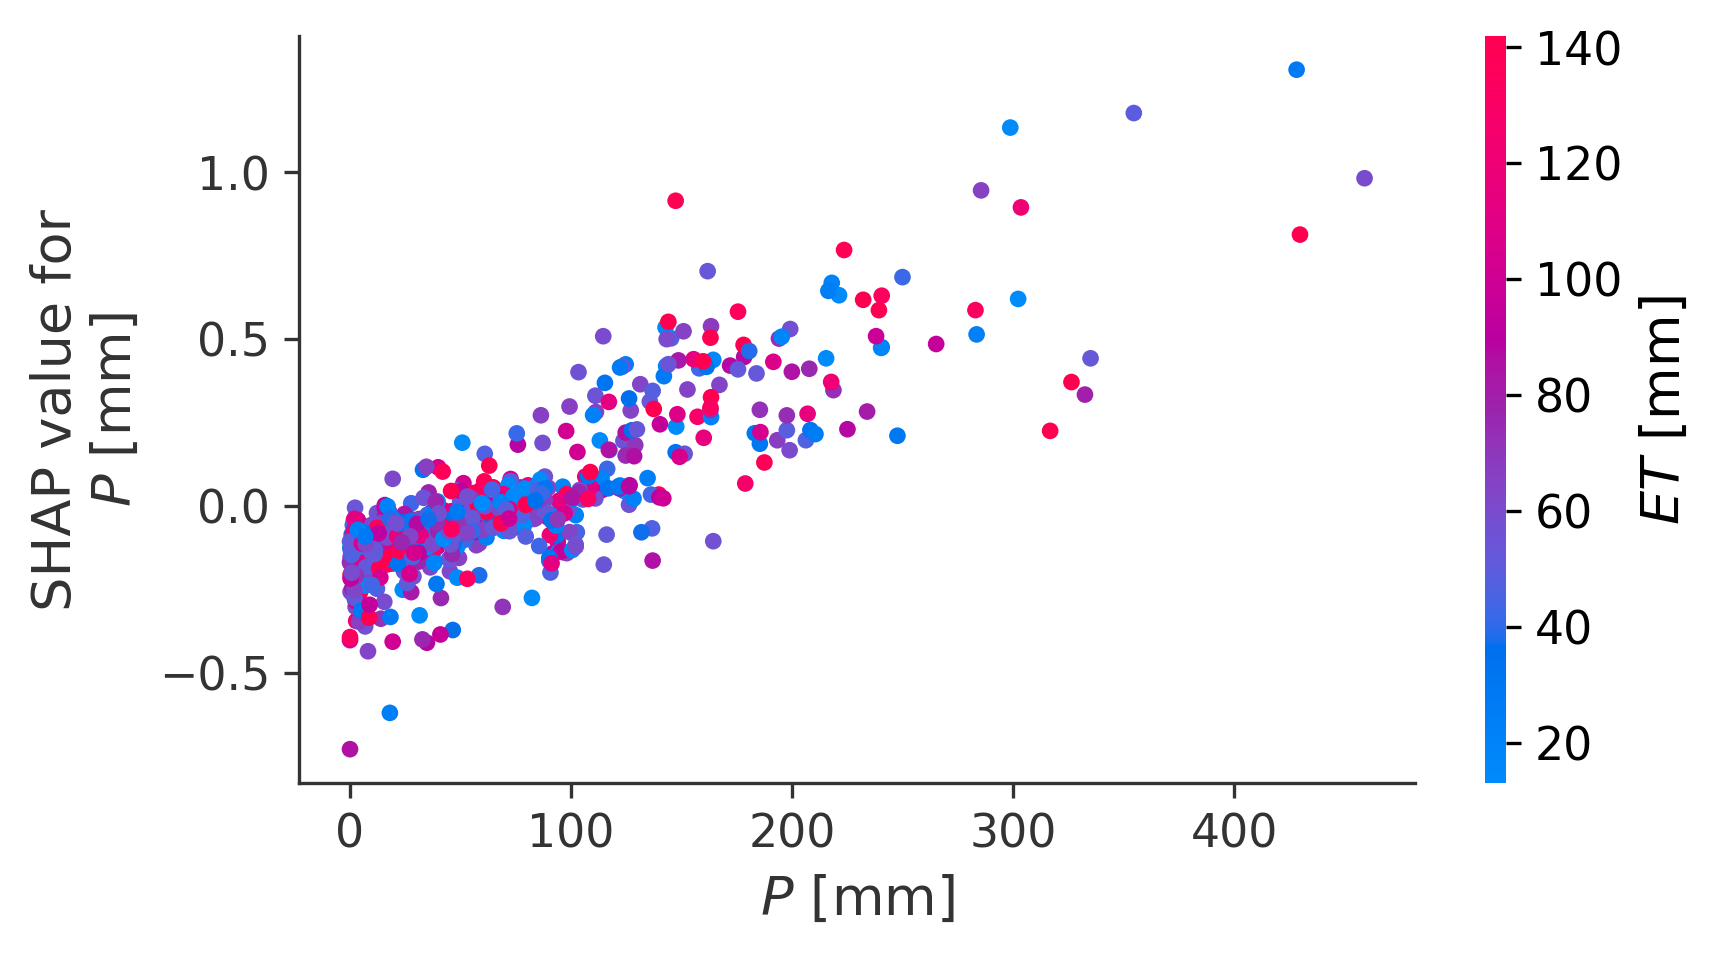

In [112]:
fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

   
shap.dependence_plot('$P$ [mm]',shap_values, df_AI[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='$ET$ [mm]')
plt.savefig(pathto_save +str('/Feature Interaction_comal_springs  - Pr-ET2 -Comal Hist.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


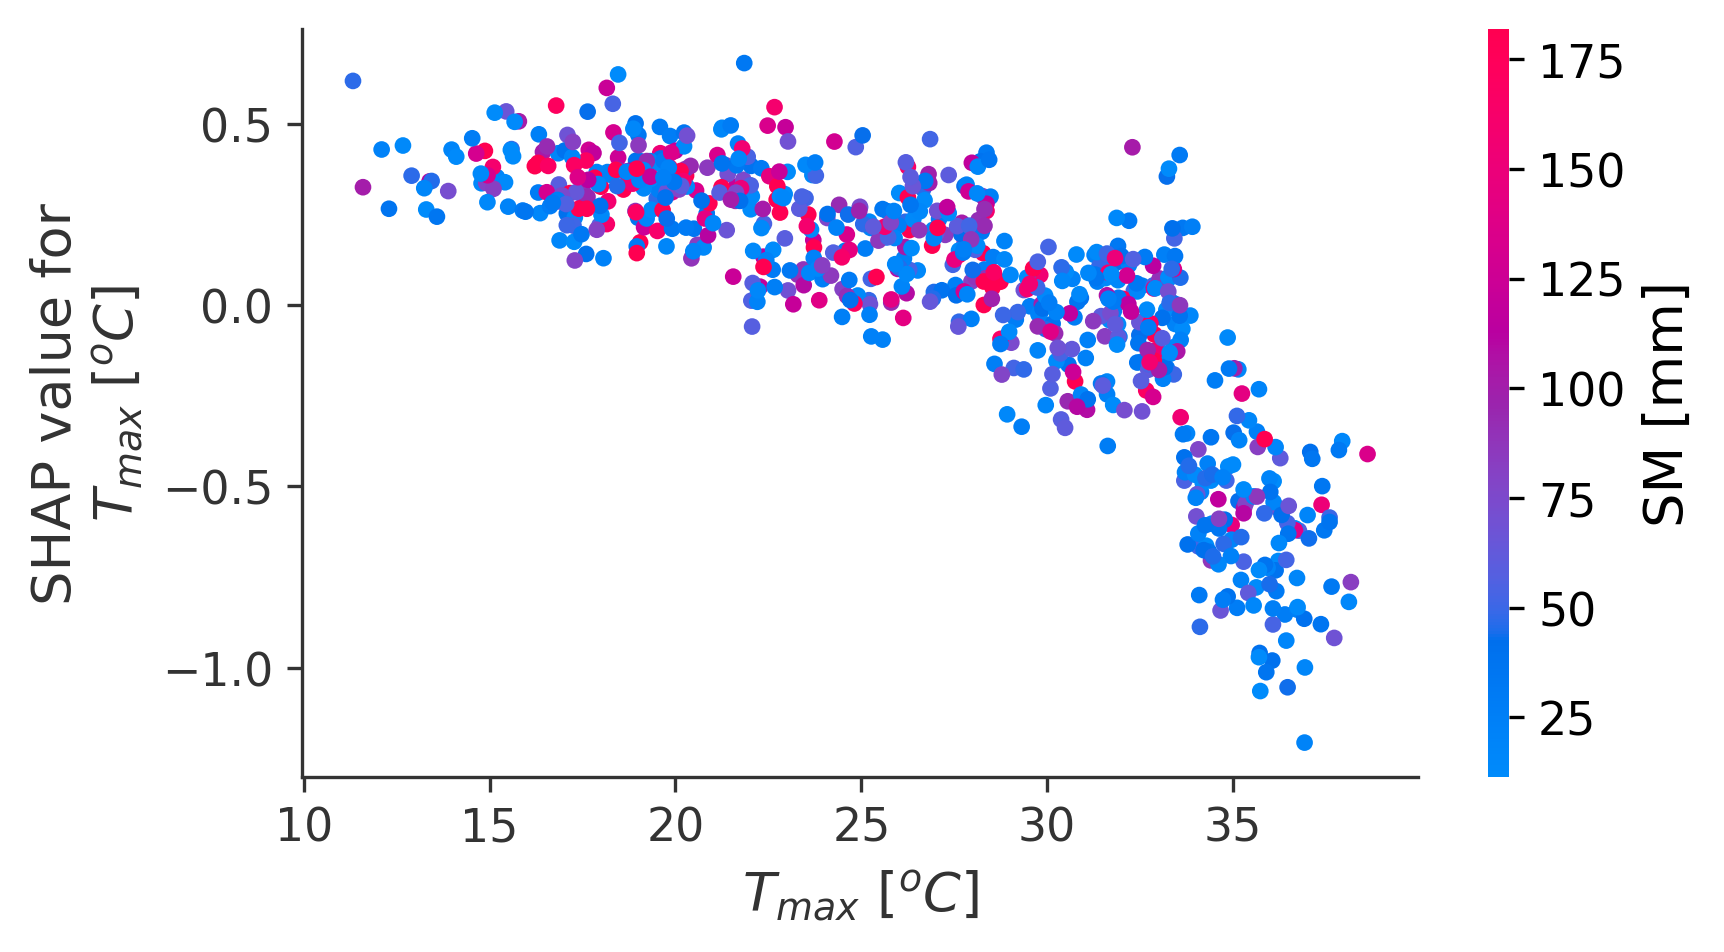

In [113]:

fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

   
shap.dependence_plot('$T_{max}$ [$^oC$]', shap_values, df_AI[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='SM [mm]')
plt.savefig(pathto_save +str('/Feature Interaction_comal_springs - Tmax2 - Hist.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


In [114]:
st_X = df_AI_Test[Features].iloc[0].to_numpy().reshape(1, -1)
test_X

name = 'comal_springs'
t0 = time()
#Call the linear regression module
lin_reg = LinearRegression(normalize=True).fit(train_X, train_y)


coef_dict = {}
for coef, feat in zip(lin_reg.coef_[0,:],Features):
    coef_dict[feat] = coef
coef_dict
with open('dict.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in coef_dict.items():
       writer.writerow([key, value])
    